# Intuitions about the corruption behavior in the government contracts and providers in Colombia

### Daniel González, Teresa Tang


<p style='text-align: justify;'> For the first part of the project we are going to have an analysis of the different aspects of the dataset. The dataset is composed by the contracts that different companies in different regions have with the government of Colombia. There has been an effort to reduce the corruption that is present in different contracts there is still a problem. Recently, there have been instances were they find in the process irregularities. For example, there are contracts that are available and they do not finish. However, the issue related to the corruption is a difficult topic to address and the data that the government of Colombia provides show different irregularities and errors that generate errors for the measurements required for this problem. We show in this study the results that the statistical analysis, and Machine Learning techniques show in an effort to demonstrate the problems that the colombian contract database has and how the measurements obtained demonstrate the presence of corruption in the country.</p>

## Abstract:

<p style='text-align: justify;'> Government corruption is present in almost,if not in all, countries around the world. Government corruption affects in a negative way the economic and social status of any country and creates a sentiment of paranoia within the population. With the rise of manifestations and riots in Latin America we found necessary to develop and analysis and understanding of the corruption in Colombia. For this study we developed an analysis using of machine learning techniques to predict the location (department), the type of contract and the type of process to give criteria of how depending of the value of the contract and the date introduced in the dataset it can show some warnings of a contract with problems. We used the SECOP II database that shows the contracts that the Colombian government with different providers for different goods and services. We used different supervised learning techniques normalizing the value of the contracts and used the recall measurement to analyze how reliable those methods were. The results showed how the method with the highest recall was the ANN and the lowest score was Naive Bayes for the location. The results of the techniques showed how the dataset has different problems and how the money of the contracts have been allocated in the capital Bogota D.C. However, this a first analysis around the design of a solution to predict and attack the corruption in Colombia. </p>

## Introduction:

Corruption can be defined in many different and broad terms. In the Merriam-Webster dictionary is defined as "dishonest or illegal behavior especially by powerful people (such as government officials or police officers)" (). Another definition might be the one developed by Mark Philp: "A public official (A), acting for personal gain, violates the norms of public office and
harms the interests of the public (B) to benefit a third party (C) who rewards A for access to goods or services which C would not otherwise obtain."(Philp, M., 2000) Authors such as Boehm, F. et al, Husted, B.W. and Jens Chr Andvig have remarked the economic and social problems that are created from the presence of corrupt officials in different countries using surveys and data after the corrupt actions has shown its consequences. Furthermore, authors such as Kaufmann, D. y P. Vicente., Lambsdorff, J. have proposed methods for anticorruption strategies in different conditions.

Nevertheless, corruption is a difficult issue to address as the benefits that public officials gain from those actions might not always be associated with economical gain. Issues such as the favoritism of companies in the contracts and the economic gains that are not registered between them and the political figures are where the most difficult problems lie. Although, this kind of information may not be registered, evidence of the location of the contract and the type of process that they create may give evidence of the corruption involved. In these past months the population in different countries of Latin America are revolting over the political climate and the history of corruption. For example, the manifestations in Chile, Ecuador and Bolivia in 2019 are the consequences of the absence of trust from the population for the politicians and the corruption that has been developing during 20 to 30 years. 

In this paper we use the case of Colombia (a Latin American country) to obtain and predict measurements that are capable from the entrance to the dataset of the transactions and contracts that the government has with different providers and companies to give alerts and prevent cases were corruption can be present. Using supervised learning we are able to predict in which location depending on the amount of money of the contract, how much money pending and the date from the contract and execution in which location, type of contract and type of the process it is. With this information authorities would have more tools to understand which contracts should they keep an eye on. For example, contracts whose features would predict a location like Bogota DC (Colombia's capital) but are located and executed in regions that are notoriously poor would give an indicator of alarm to authorities. There have been studies about the corruption in the departments and the such as Uribe, L. et al (2019) where they established indexes relating the development, institutional capacity and the transparency of each department.

The structure of the present study is the following: Section II presents the dataset, the key feature selection and the assumptions we took for the creation and understanding of the analysis. Section III presents the methodology of the analysis. Furthermore, it presents the different algorithms we used for each of the measurements and which one we decided. Section IV presents the analysis of the results and the changes that a dataset would require to be more precise in the data necessary for creating anticorruption policies. Section V presents the conclusions of the study and the future work.

## Dataset Description:

The dataset used in this analysis is called SECOP II. This dataset was created as a depuration of a larger dataset called SECOP I. In SECOP II we can find the contracts the government of Colombia has in different stages of the procedure, the value of each contract and the dates that the contract had for its execution. The dataset was obtained from a specialized page the government of Colombia created for researchers to use for analysis (datos.gov.co). Furthermore, we can obtain information about the description and the entities that assigned the contracts. We present the initial set of data with all the characteristics. 

In [31]:
#Import the libraries to manipulate data, graphs and missing values.
import pandas as pd
import numpy as np
from numpy import nan as NA
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
#Read and show the information contained in the file.
df=pd.read_csv("SECOP_II_Contratos_v1.csv", quotechar='"',low_memory=False)
#Show the different types of data in the dataset,
df.dtypes

Nombre Entidad                      object
Nit Entidad                          int64
Proceso de Compra                   object
Descripción del Proceso             object
Tipo de Contrato                    object
Referencia del Contrato             object
Fecha de Inicio del Contrato        object
Fecha de Fin del Contrato           object
Fecha de Inicio de Ejecucion        object
Fecha de Fin de Ejecucion           object
Condiciones de Entrega              object
Proveedor Adjudicado                object
Es Grupo                              bool
Estado Contrato                     object
Habilita Pago Adelantado            object
Liquidacion                         object
Obligaciones Ambientales            object
Obligaciones Postconsumo            object
Reversion                           object
Valor del Contrato                 float64
Valor de pago adelantado           float64
Valor Facturado                    float64
Valor Pendiente de Pago            float64
Valor Pagad

To begin with an analysis of the dataset and the strategies to combat corruption we had to transform the dataset in several aspects. First, we removed the duplicate values and the contracts that were cancelled or in a state of incompletion using the following code.

In [33]:
# check duplicates
# No duplicates
df=df.drop_duplicates()
df.count()

Nombre Entidad                     353503
Nit Entidad                        353503
Proceso de Compra                  353503
Descripción del Proceso            349633
Tipo de Contrato                   353503
Referencia del Contrato            353400
Fecha de Inicio del Contrato       324342
Fecha de Fin del Contrato          324341
Fecha de Inicio de Ejecucion       244211
Fecha de Fin de Ejecucion          245805
Condiciones de Entrega             353503
Proveedor Adjudicado               335933
Es Grupo                           353503
Estado Contrato                    353503
Habilita Pago Adelantado           353503
Liquidacion                        353503
Obligaciones Ambientales           353503
Obligaciones Postconsumo           353503
Reversion                          353503
Valor del Contrato                 353503
Valor de pago adelantado           349089
Valor Facturado                    349090
Valor Pendiente de Pago            349090
Valor Pagado                      

### Evaluation for missing/empty value in each contract(row) (part 1)
* Adding a column named "Empty"
* "Empty" acts as a counter that records number of missing value in each contract
* The more missing value the contract contains, the more we need to look into/evaluate the contract

In [34]:
#Add the empty values in the dataset to see the number of missing values.
df["Empty"]=""
for i in range(len(df)):
    df.at[i,"Empty"]= df.iloc[i].isnull().sum()


### Evaluation for missing/empty value in each contract(row) (part 2)
problems contract signning and execution dates columns

Contract signing side
columns: "Fecha de Inicio del Contrato" and "Fecha de Fin del Contrato"
1. no contract starting date but with contract ending date(Abnormal)
2. has contract starting date but no contract ending date(Can be normal for contract not finished)
3. no contract starting date no contract ending date but has execution dates(Abnormal)

Execution side
columns: "Fecha de Inicio de Ejecucion" and "Fecha de Fin de Ejecucion"
1. no execution starting date but with execution ending date(Abnormal)
2. has execution starting date but no execution ending date(Can be normal for execution not completed)

Abnormality:
1. contract end date without a start date
2. Execution end date without a start date

In [35]:
#Analyze for which values the date of the contract is missing.
for i in range(len(df)):
    if (pd.isna(df.at[i,"Fecha de Inicio del Contrato"]) == True) and (pd.isna(df.at[i,"Fecha de Fin del Contrato"]) == False):
        df.at[i,"Fecha de Inicio del Contrato"]="missing contract start date"
    if (pd.isna(df.at[i,"Fecha de Inicio de Ejecucion"]) == True) and (pd.isna(df.at[i,"Fecha de Fin de Ejecucion"]) == False):
        df.at[i,"Fecha de Inicio de Ejecucion"]="missing execution start date"

Abnormality:
1. Contract being fully executed but does not have a contract start or contract end date

In [36]:
#Analyze the missing values of the execution date.
for i in range(len(df)):
    if (pd.isna(df.at[i,"Fecha de Inicio de Ejecucion"]) == False) and (pd.isna(df.at[i,"Fecha de Fin de Ejecucion"]) == False):
        if (pd.isna(df.at[i,"Fecha de Inicio del Contrato"]) == True):
            df.at[i,"Fecha de Inicio del Contrato"]="missing contract start date"
        if (pd.isna(df.at[i,"Fecha de Inicio del Contrato"]) == True):
            df.at[i,"Fecha de Fin del Contrato"]="missing contract end date"

In [37]:
#Show the first part of the dataset.
df.head()

,Nombre Entidad,Nit Entidad,Proceso de Compra,Descripción del Proceso,Tipo de Contrato,Referencia del Contrato,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion,...,Anno BPIN,Codigo BPIN,Tipo Documento Proveedor,Documento Proveedor,Es Post Conflicto,URL Proceso,ID Contrato,Departamento,Municipio,Empty
0,FONDO FINANCIERO DISTRITAL DE SALUD,8002469532,CO1.BDOS.620741,Prestar servicios profesionales especializados...,Prestación de servicios,CO1.PCCNTR.678206,12/12/2018,4/11/2019,12/12/2018,4/11/2019,...,2018.0,NaN,Cédula de Ciudadanía,14209038,NaN,NaN,CO1.PCCNTR.678206,Distrito Capital de Bogotá,Bogotá,10
1,MUNICIPIO SANTIAGO DE CALI - SECRETARIA DE DEP...,890399011,CO1.BDOS.744240,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,Prestación de servicios,CO1.PCCNTR.840559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CO1.PCCNTR.840559,Valle del Cauca,Cali,12
2,MINISTERIO DE JUSTICIA Y DEL DERECHO,900457461,CO1.BDOS.604215,Por medio del presente Contrato de Comisión la...,Comisión,Contrato No. 483 de 2018,11/7/2018,6/30/2019,11/7/2018,11/7/2018,...,NaN,NaN,NIT,805000867,0.0,NaN,CO1.PCCNTR.679775,Distrito Capital de Bogotá,Bogotá,10
3,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADÍ...,899999027,CO1.BDOS.464906,GEIH_U_TH_TU_OT Prestación de servicios de apo...,Prestación de servicios,CO1.PCCNTR.473703,7/9/2018,11/30/2018,7/9/2018,11/30/2018,...,2018.0,NaN,Cédula de Ciudadanía,45486495,0.0,NaN,CO1.PCCNTR.473703,Atlántico,No Definido,2
4,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,819000759,CO1.BDOS.623256,Arrendamiento de espacios de parqueo en el co...,Arrendamiento de inmuebles,DTCA-AR-022-2018,12/6/2018,11/30/2019,NaN,NaN,...,NaN,NaN,Cédula de Ciudadanía,26848409,0.0,NaN,CO1.PCCNTR.680397,Magdalena,Santa Marta,12


In [38]:
#We show the unique values in the state of the contract.
df['Estado Contrato'].unique()

array(['Activo', 'Cancelado', 'Modificado', 'Cerrado',
       'enviado Proveedor', 'Borrador', 'En aprobación', 'Suspendido',
       'terminado', 'cedido', 'Prorrogado'], dtype=object)

In [39]:
#Show the basic values for the numerical values of the dataset.
df.describe()

,Nit Entidad,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Anno BPIN,Codigo BPIN,Es Post Conflicto
count,3.535030e+05,3.535030e+05,3.490890e+05,3.490900e+05,3.490900e+05,3.490900e+05,3.490900e+05,3.490900e+05,3.490900e+05,132735.000000,6.097000e+03,158485.000000
mean,1.371680e+09,3.745202e+11,1.259672e+06,1.509701e+07,2.051169e+08,1.175401e+07,2.047414e+04,1.239236e+06,2.038536e+08,2018.513354,1.972943e+12,0.020172
std,1.936327e+09,3.962528e+13,1.065554e+08,3.267005e+08,6.045883e+09,2.961773e+08,3.469097e+06,1.064664e+08,6.118001e+09,0.503233,2.577524e+11,0.140590
min,5.197685e+07,0.000000e+00,0.000000e+00,0.000000e+00,-4.062180e+08,0.000000e+00,0.000000e+00,0.000000e+00,-5.445000e+10,2016.000000,8.011150e+07,0.000000
25%,8.300679e+08,7.500000e+06,0.000000e+00,0.000000e+00,4.666667e+06,0.000000e+00,0.000000e+00,0.000000e+00,5.451643e+06,2018.000000,2.020000e+12,0.000000
50%,8.999990e+08,1.924922e+07,0.000000e+00,0.000000e+00,1.499486e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.623292e+07,2019.000000,2.020000e+12,0.000000
75%,9.004130e+08,4.420416e+07,0.000000e+00,0.000000e+00,3.737769e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.001048e+07,2019.000000,2.020000e+12,0.000000
max,9.009586e+09,9.801000e+15,3.820286e+10,7.111629e+10,9.368902e+11,6.917979e+10,1.117180e+09,3.820286e+10,9.368902e+11,2019.000000,2.020000e+12,1.000000


## Descriptive Statistics:

We now show the different descriptive statistics that were obtained from the database. The following graphs show outliers in the contracts data in the amounts that were registered. Nevertheless, we are interested in these outliers as the may show cases of corruption or problems with the management of the information. As such, we decided to show boxplots for these values.

### Contract Values:

One of the most important aspects of the analysis will be around the value of the contracts. Each contract has eight different values that show the state of the contract related to the goverment entity. Nevertheless, we will focus on four of these. "Valor del Contrato" is the total value registered for the contract. The values that show as 0 are because they could have been cancelled or they can have other kinds of problems. "Valor Facturado" is the value that has been registered by the companies, "Valor Pendiente de Pago" is the value that has not been paid still in the contract. "Valor Pagado" is the amount of money that has been officially given to the providers by the government. For this graph we show the factured value of the contracts in a logarithmic scale as there are many contracts who have high values and hide the values of the other contracts.

In [40]:
#We took the values of the features that we are going to use for the analysis such as the department, the town and the type of process.
df2=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the values in the contract that are incomplete with 0.
df2=df2.fillna(0)
df2.drop(df2['Diferecia Fechas Contrato'].idxmax())

,Nombre Entidad,Tipo de Contrato,Tipo de Proceso,Departamento,Municipio,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Diferecia Fechas Contrato,Diferencia Fechas Ejecucion
0,FONDO FINANCIERO DISTRITAL DE SALUD,Prestación de servicios,Contratación directa,Distrito Capital de Bogotá,Bogotá,2.641804e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120,120
1,MUNICIPIO SANTIAGO DE CALI - SECRETARIA DE DEP...,Prestación de servicios,Contratación directa,Valle del Cauca,Cali,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,MINISTERIO DE JUSTICIA Y DEL DERECHO,Comisión,Contratación régimen especial,Distrito Capital de Bogotá,Bogotá,4.326739e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235,0
3,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADÍ...,Prestación de servicios,Contratación directa,Atlántico,No Definido,8.138026e+06,0.0,2985826.0,5152200.0,2985826.0,0.0,0.0,8138026.0,144,144
4,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,Arrendamiento de inmuebles,Contratación directa,Magdalena,Santa Marta,5.549363e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359,0
5,MUNICIPIO SANTIAGO DE CALI - SECRETARIA DE DEP...,Prestación de servicios,Contratación directa,Valle del Cauca,Cali,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,POLICIA METROPOLITANA DE PEREIRA,Arrendamiento de inmuebles,Contratación directa,Risaralda,Pereira,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADÍ...,Prestación de servicios,Contratación directa,Atlántico,No Definido,9.848026e+06,0.0,9848026.0,0.0,9848026.0,0.0,0.0,9848026.0,144,53
8,INSTITUTO DE DEPORTES Y RECREACION DE MEDELLIN,Otro,Contratación régimen especial,Antioquia,Medellín,2.600000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
9,MUNICIPIO SANTIAGO DE CALI - SECRETARIA DE DEP...,Prestación de servicios,Contratación directa,Valle del Cauca,Cali,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Text(0, 0.5, 'Range of applied value')

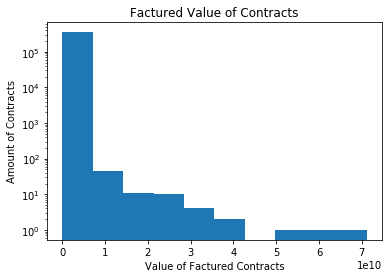

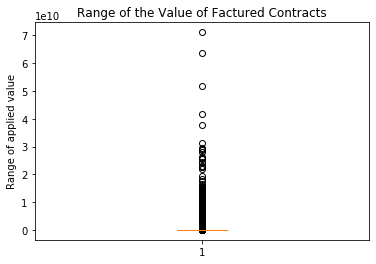

In [41]:
#Present the amount of contracts related to the factured values as a histogram.
plt.hist(df2['Valor Facturado'])
plt.yscale('log')
plt.title('Factured Value of Contracts')
plt.xlabel('Value of Factured Contracts')
plt.ylabel('Amount of Contracts')
#Present the amount of contracts related to the factured values  as a boxplot.
li=np.array(df2['Valor Facturado'], dtype='float64')
import pylab
pylab.figure()
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the Value of Factured Contracts')
plt.ylabel('Range of applied value')

We show how there are some values of the contracts that have a value that exceeds the normal amount of the contracts. This shows the range of the contracts that are presented in the dataset. With this in mind we present a boxplot to understand the range of the value of the contracts.

(array([3.53469e+05, 6.00000e+00, 1.30000e+01, 1.00000e+00, 8.00000e+00,
        1.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.0000e+00, 9.8010e+14, 1.9602e+15, 2.9403e+15, 3.9204e+15,
        4.9005e+15, 5.8806e+15, 6.8607e+15, 7.8408e+15, 8.8209e+15,
        9.8010e+15]),
 <a list of 10 Patch objects>)

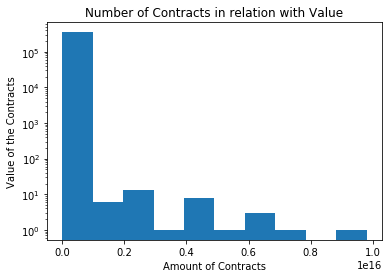

In [42]:
#Present the amount of contracts related to the contract values as a histogram.
plt.yscale('log')
plt.title('Number of Contracts in relation with Value')
plt.xlabel('Amount of Contracts')
plt.ylabel('Value of the Contracts')
plt.hist(df2['Valor del Contrato'])


This range has a great amount of contract values and it shows the difference in the values of the contracts. Many of the highervalues of the contracts could be the projects that are presented nationwide or errors in the input of the values. We develop the graphs for the different instances in the values of the contracts.

Text(0, 0.5, 'Range of contract value')

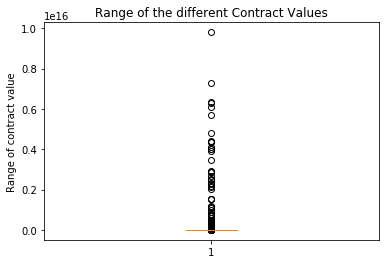

In [43]:
#Present the amount of contracts related to the contract values as a boxplot.
li=np.array(df2['Valor del Contrato'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the different Contract Values')
plt.ylabel('Range of contract value')

Text(0, 0.5, 'Amount of Contracts')

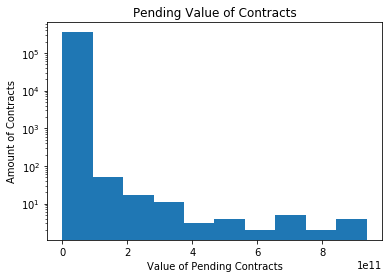

In [44]:
#Present the amount of contracts related to the pending values as a histogram.
plt.hist(df2['Valor Pendiente de Pago'])
plt.yscale('log')
plt.title('Pending Value of Contracts')
plt.xlabel('Value of Pending Contracts')
plt.ylabel('Amount of Contracts')

Text(0.5, 0, 'Pending Value of Contracts')

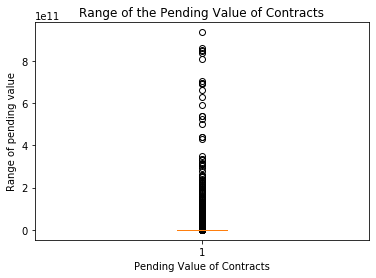

In [45]:
#Present the amount of contracts related to the pending value of the contracts  as a boxplot.
li=np.array(df2['Valor Pendiente de Pago'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the Pending Value of Contracts')
plt.ylabel('Range of pending value')
plt.xlabel('Pending Value of Contracts')

Text(0, 0.5, 'Quantity of Values')

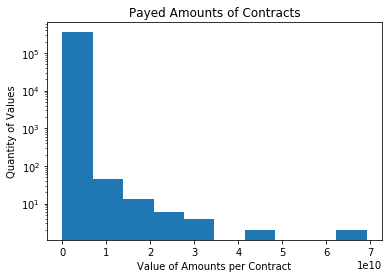

In [46]:
#Present the amount of contracts related to the payed values of the contracts as a histogram.
plt.hist(df2['Valor Pagado'])
plt.yscale('log')
plt.title('Payed Amounts of Contracts')
plt.xlabel('Value of Amounts per Contract')
plt.ylabel('Quantity of Values')

Text(0, 0.5, 'Range of paid value')

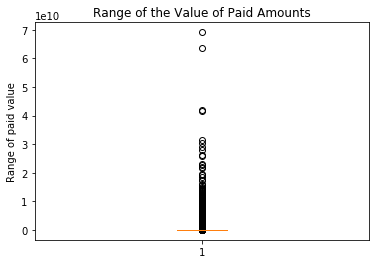

In [47]:
#Present the amount of contracts related to the payed values of the contracts as a boxplot.
li=np.array(df2['Valor Pagado'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the Value of Paid Amounts')
plt.ylabel('Range of paid value')

Text(0, 0.5, 'Amount of Contracts')

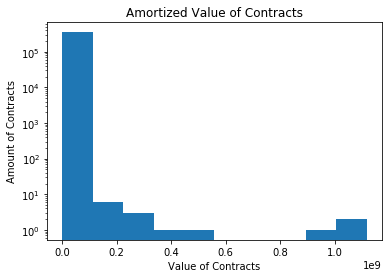

In [48]:
#Present the amount of contracts related to the amortized values of the contracts as a histogram.
plt.hist(df2['Valor Amortizado'])
plt.yscale('log')
plt.title('Amortized Value of Contracts')
plt.xlabel('Value of Contracts')
plt.ylabel('Amount of Contracts')

Text(0, 0.5, 'Range of amortized value')

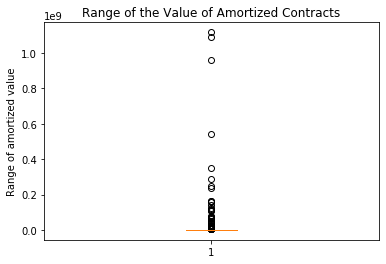

In [49]:
#Present the amount of contracts related to the amortized values of the contracts as a boxplot.
li=np.array(df2['Valor Amortizado'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the Value of Amortized Contracts')
plt.ylabel('Range of amortized value')

Text(0, 0.5, 'Amount of Contracts')

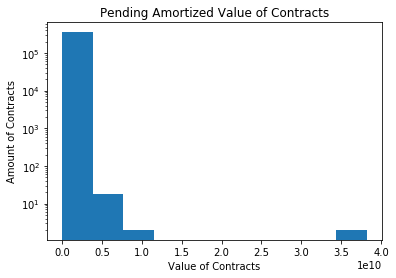

In [50]:
#Present the amount of contracts related to the amortized pending values of the contracts as a histogram.
plt.hist(df2['Valor Pendiente de Amortizacion'])
plt.yscale('log')
plt.title('Pending Amortized Value of Contracts')
plt.xlabel('Value of Contracts')
plt.ylabel('Amount of Contracts')

Text(0, 0.5, 'Range of pending amortizations')

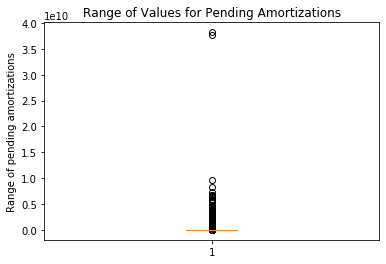

In [51]:
#Present the amount of contracts related to the values for pending amortizations as a boxplot.
li=np.array(df2['Valor Pendiente de Amortizacion'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of Values for Pending Amortizations')
plt.ylabel('Range of pending amortizations')

Text(0, 0.5, 'Amount of Contracts')

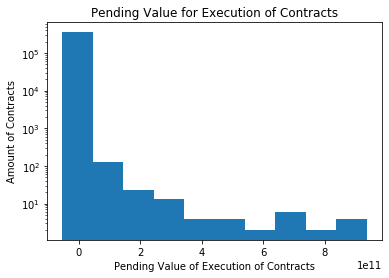

In [52]:
#Present the amount of contracts related to the pending execution values of the contracts as a histogram.
plt.hist(df2['Valor Pendiente de Ejecucion'])
plt.yscale('log')
plt.title('Pending Value for Execution of Contracts')
plt.xlabel('Pending Value of Execution of Contracts')
plt.ylabel('Amount of Contracts')

Text(0, 0.5, 'Range of pending execution value')

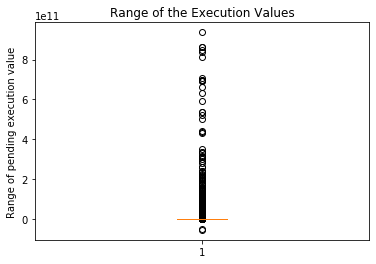

In [53]:
#Present the amount of contracts related to the executed values of the contracts as a boxplot.
li=np.array(df2['Valor Pendiente de Ejecucion'], dtype='float64')
plt.boxplot(li[~np.isnan(li)])
plt.title('Range of the Execution Values')
plt.ylabel('Range of pending execution value')

As we can see in everyone of these categories there are a wide range of values. Consequently, we used a logarithmic scale for the frequency in the histograms to be able to understand the information. Furthermore, we used boxplots to show the range of values rather than a histogram. We will now focus on the other values in the dataset related to categorical values. There are many contracts that are between 0 and 0.4e16 which means that even taking into account some as outliers there is a enormous range in the contract values.

### Categorical Variables:

There are different values to take into account for the analysis of corruption in the database. To understand which kind of contracts we are dealing with we created the countplots for the different kinds of contracts the types of IDs of the providers, the Department, the name of the entity and the adjudicated provider.

In [54]:
#Libraries necessary for the analysis of the categorical values.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

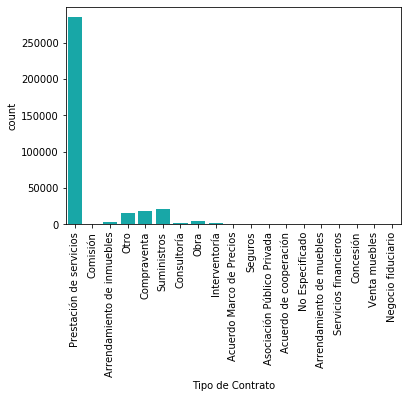

In [55]:
# the histogram of the data for the kind of contract
sns.countplot(x=df2['Tipo de Contrato'], color="c")
plt.xticks(rotation=90)
plt.show()

There a lot of different type of contracts and the vast majority of them is the category of "Prestacion de servicios". There are also many other categories that are not being represented in relation to this category. It is not a good sign as the category may not correctly represent all the different types of contracts. We will analyze the data without this category.

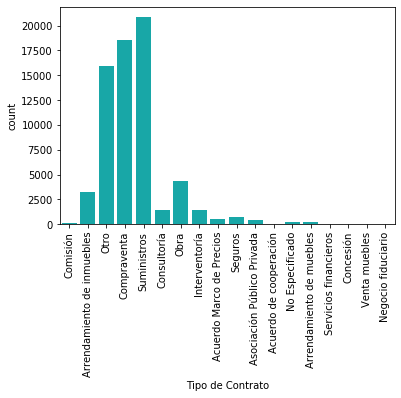

In [56]:
df3=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the values in the contract that are incomplete with 0.
df3=df3.fillna(0)
df3.drop(df3['Diferecia Fechas Contrato'].idxmax())
#We drop the category "Prestacion de Servicios"
indexNames=df3[df3['Tipo de Contrato']=='Prestación de servicios'].index
df3.drop(indexNames,inplace=True)
#Histogram for the type of contract without the category "Prestacion de Servicios".
sns.countplot(x=df3['Tipo de Contrato'], color="c")
plt.xticks(rotation=90)
plt.show()

Now we see the other categories but there are still underrepresented categories. This shows how biased the dataset is. This will affect the Machine Learning attributes but we will obtain the measurements with and without the most used category to see the difference in the measurements obtained.

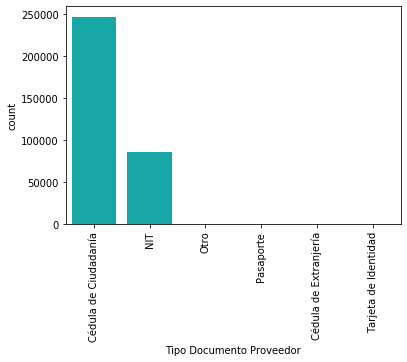

In [57]:
#Plot of the different process document of the providers.
sns.countplot(x=df['Tipo Documento Proveedor'], color="c")
plt.xticks(rotation=90)
plt.show()

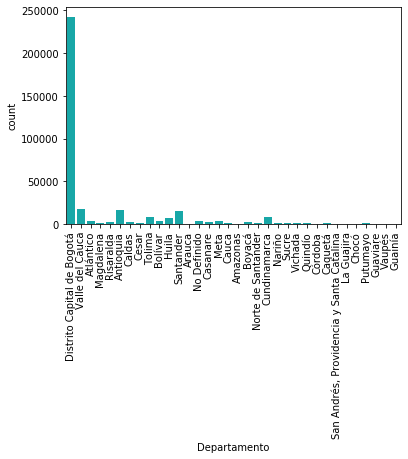

In [58]:
#Plot of the localization in the departments of the contracts.
sns.countplot(x=df['Departamento'], color="c")
plt.xticks(rotation=90)
plt.show()

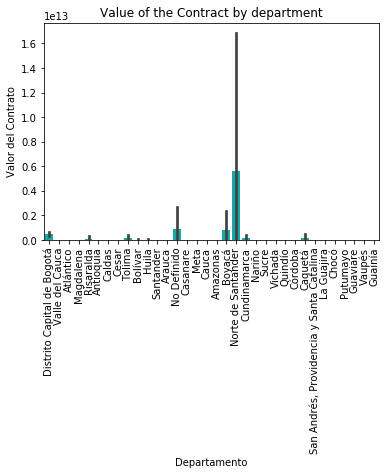

In [60]:
sns.barplot(x=df['Departamento'],y=df['Valor del Contrato'], color="c")
plt.title('Value of the Contract by department')
plt.xticks(rotation=90)
plt.show()

We see the same phenomenon in the department category. The histogram without the presence of Bogota D.C. This has happened because the majority of the contracts presented are signed in Bogota D.C. However, the second plot presented shows that the amount of money has been invested in the "Norte de Santander" department while the rest of the regions do not have enough projects. We show the histogram without the Bogota D.C. category.

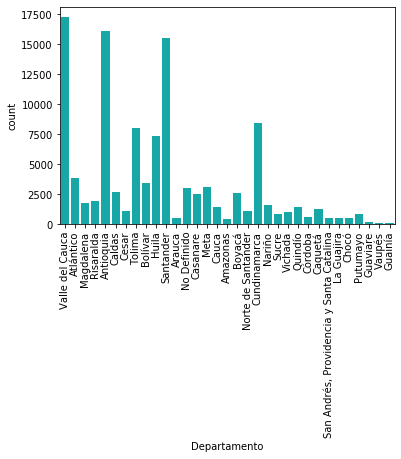

In [61]:
#Definition of the dataset for the analysis of the locations in the departments of the contracts.
df3=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the values in the contract that are incomplete with 0.
df3=df3.fillna(0)
df3.drop(df3['Diferecia Fechas Contrato'].idxmax())
#We drop the category "Distrito Capital de Bogotá"
indexNames=df3[df3['Departamento']=='Distrito Capital de Bogotá'].index
df3.drop(indexNames,inplace=True)
#Creation of the histogram for the departments of the contracts.
sns.countplot(x=df3['Departamento'], color="c")
plt.xticks(rotation=90)
plt.show()

Now we see a different behavior in the histogram and how the presence of the category of Bogota D.C. might affect the Machine Learning algorithms as they will tend to predict most of the contracts associating them with its category. Finally, we present the desciption of the values in the SECOP II dataset.

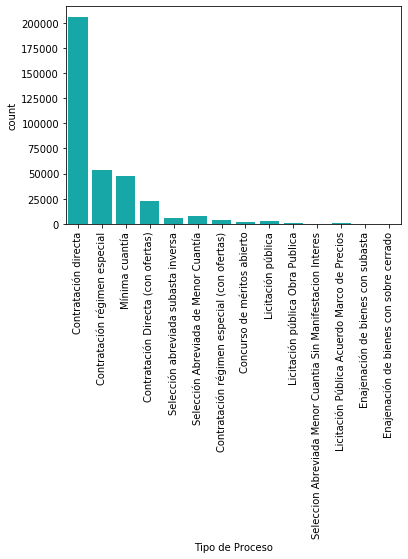

In [62]:
#Plot of the kinds of Contract
sns.countplot(x=df['Tipo de Proceso'], color="c")
plt.xticks(rotation=90)
plt.show()

Finally we are able to show the type of process for each contract detailed in the database of SECOP II. However it has the same problem with the amount of contracts that are in the category of "Contratacion Directa". We remove this category to look at the amount of other types of processes in the database.

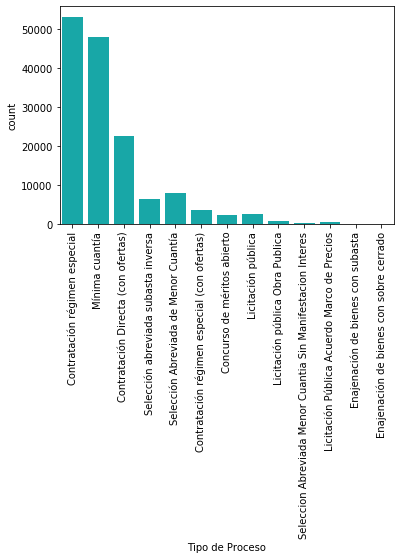

In [63]:
#Definition of the dataset for the analysis of the types of processes.
df3=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the values in the contract that are incomplete with 0.
df3=df3.fillna(0)
df3.drop(df3['Diferecia Fechas Contrato'].idxmax())
#We drop the category "Prestacion de Servicios"
indexNames=df3[df3['Tipo de Proceso']=='Contratación directa'].index
df3.drop(indexNames,inplace=True)
#Creation of the plot for the type of processes.
sns.countplot(x=df3['Tipo de Proceso'], color="c")
plt.xticks(rotation=90)
plt.show()

In [64]:
#Definition of the basic statistics for the different features.
print(df2.describe())

       Valor del Contrato  Valor de pago adelantado  Valor Facturado  \
count        3.535030e+05              3.535030e+05     3.535030e+05   
mean         3.745202e+11              1.243943e+06     1.490854e+07   
std          3.962528e+13              1.058881e+08     3.246592e+08   
min          0.000000e+00              0.000000e+00     0.000000e+00   
25%          7.500000e+06              0.000000e+00     0.000000e+00   
50%          1.924922e+07              0.000000e+00     0.000000e+00   
75%          4.420416e+07              0.000000e+00     0.000000e+00   
max          9.801000e+15              3.820286e+10     7.111629e+10   

       Valor Pendiente de Pago  Valor Pagado  Valor Amortizado  \
count             3.535030e+05  3.535030e+05      3.535030e+05   
mean              2.025563e+08  1.160727e+07      2.021855e+04   
std               6.008070e+09  2.943257e+08      3.447376e+06   
min              -4.062180e+08  0.000000e+00      0.000000e+00   
25%               4.4

## Analysis:

Corruption is a difficult issue around the world and the absence of data is a problem when Machine Learning algorithms rely on data. Consequently, we addressed these problems by using the recall measurement using different methods to analyze how reliable might each algorithm. It is important to notice that the predictions that the algorithms will present will be full of errors or mistakes but this shows the evidence necessary for the colombian government to change the information in the dataset and have an analysis of the requirements for being able to develop a true dataset that can attack corruption.

In [65]:
#Library of Python to manipulate the data.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Library of Python to perform mathematical equations
import numpy as np
#Function to manage the missing data.
from numpy import nan as NA
#Library to create different graphs.
import seaborn as sns
#Library to create the graphs necessary for a first analysis
import matplotlib.pyplot as plt

We will use supervised learning as we analyzed the predicted department, the type of contract and the type of process. We have seen that the data is biased against a certain type of category for each one of the features that we are trying to predict. Although, these measurements might not account for a real life scenario we will divide the analysis to see the results for the recall measurement with and without the categories of certain departments, type of contracts and type of processes. Consequently, we will try to solve a classification problem related to each of the categorical features we are analyzing.

### Supervised Learning:



In [66]:
import pandas as pd
#Creation of the different Dataframes used for the analysis.
dfNormal=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the missed data in the value of the contracts and its other related features.
dfNormal=dfNormal.fillna(0)
#We dropped the maximum difference in the contract dates as it was an amount of days greater than the 3 years date of the contracts.
dfNormal['Diferecia Fechas Contrato'].idxmax()
dfNormal.drop(df2['Diferecia Fechas Contrato'].idxmax())
indexNames=df[df['Estado Contrato']=='Borrador'].index
dfNormal.drop(indexNames, inplace=True)
indexNames=df[df['Estado Contrato']=='Cancelado'].index
dfNormal.drop(indexNames, inplace=True)



The analysis for each of the methods will be made with all the data points in the data set and another set without the bias in the amount of data of each category. For example, the majority of contracts are assigned to Bogotá. We used the recall as a measurement as we require the percentage of the contracts that are assigned correctly over the total of contracts. Furthermore, we use the weighted and micro recall as they use the values in each category ( which manages the amount of contracts for each category) rather than the total amount.

We used seven different methods for the three categories and each one of them with and without the category value that generated the bias in the dataset. The following sections show the methods used and the measurements obtained.

## 1. Logistic Regression:

### 1.1.1 Department with all the data:

In [79]:
#Import the necessary libraries for the linear regression analysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


#Definition of the dataset with all the data.
XNormal=dfNormal.iloc[:,[5,6,7,8,9,10,11,12,13,14]].values
y1=dfNormal['Departamento']
y2=dfNormal['Tipo de Proceso']
y3=dfNormal['Tipo de Contrato']

#Method for the logistic regression.
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)
logreg=LogisticRegression().fit(XNormal_train,y1_train)
y1_pred = logreg.predict(XNormal_test)

#Present the results of the accuracy.
print('Department accuracy:')
print('Training set score: {:.3f}'.format(logreg.score(XNormal_train, y1_train)))
print('Test set score: {:.3f}'.format(logreg.score(XNormal_test, y1_test)))


y1_pred_test = logreg.predict(XNormal_test)
y1_pred_train=logreg.predict(XNormal_train)
print("Macro Recall Training",metrics.recall_score(y1_train,y1_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y1_test,y1_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y1_train,y1_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y1_test,y1_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y1_test,y1_pred_test,average='weighted'))


C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Department accuracy:
Training set score: 0.680
Test set score: 0.679
Macro Recall Training 0.03349066614184314
Macro Recall Test 0.03322478324480035
Micro Recall Training 0.6802264535843008
Micro Recall Test 0.6792620210851118
Weighted Recall Training 0.6802264535843008
Weighted Recall Test 0.6792620210851118


### 1.1.2 Department without Bogota:

In [80]:
#Definition of the dataset without the category of "Distrito Capital Bogotá".
dfPrunDep=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')

#We fill the values in the contract that are incomplete with 0.
dfPrunDep=dfPrunDep.fillna(0)
indexNames=df[df['Estado Contrato']=='Borrador'].index
dfPrunDep.drop(indexNames, inplace=True)
indexNames=df[df['Estado Contrato']=='Cancelado'].index
dfPrunDep.drop(indexNames, inplace=True)
dfPrunDep.drop(dfPrunDep['Diferecia Fechas Contrato'].idxmax())

#We drop the category "Prestacion de Servicios"
indexNames=dfPrunDep[dfPrunDep['Departamento']=='Distrito Capital de Bogotá'].index
dfPrunDep.drop(indexNames,inplace=True)


In [82]:
#Definition of the datasets we are going to use for the prunned department.
XPrunDep=dfPrunDep.iloc[:,[5,6,7,8,9,10,11,12,13,14]].values
y4=dfPrunDep['Departamento']

#Method for the logistic regression.
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)
logreg=LogisticRegression().fit(XPrunDep_train,y4_train)
y4_pred = logreg.predict(XPrunDep_test)

#Present the results of the accuracy.
print('Department Accuracy:')
print('Training set score: {:.3f}'.format(logreg.score(XPrunDep_train, y4_train)))
print('Test set score: {:.3f}'.format(logreg.score(XPrunDep_test, y4_test)))

y4_pred_test = logreg.predict(XPrunDep_test)
y4_pred_train=logreg.predict(XPrunDep_train)
print("Macro Recall Training",metrics.recall_score(y4_train,y4_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y4_test,y4_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y4_train,y4_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y4_test,y4_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y4_test,y4_pred_test,average='weighted'))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Department Accuracy:
Training set score: 0.141
Test set score: 0.141
Macro Recall Training 0.03051310410588826
Macro Recall Test 0.030448760369792993
Micro Recall Training 0.14120254918259906
Micro Recall Test 0.14105814388429408
Weighted Recall Training 0.14120254918259906
Weighted Recall Test 0.14105814388429408


Analisys

### 1.2.1 Type of Process with all the data:

In [164]:
#Method for the logistic regression.
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)
logreg=LogisticRegression().fit(XNormal_train,y2_train)
y2_pred = logreg.predict(XNormal_test)

#Present the results of the accuracy.
print('Type of Contract Accuracy')
print('Training set score: {:.3f}'.format(logreg.score(XNormal_train, y2_train)))
print('Test set score: {:.3f}'.format(logreg.score(XNormal_test, y2_test)))


y2_pred_test = logreg.predict(XNormal_test)
y2_pred_train=logreg.predict(XNormal_train)
print("Macro Recall Training",metrics.recall_score(y2_train,y2_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y2_test,y2_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y2_train,y2_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y2_test,y2_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y2_test,y2_pred_test,average='weighted'))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Type of Contract Accuracy
Training set score: 0.217
Test set score: 0.218
Macro Recall Training 0.08654026434305526
Macro Recall Test 0.08682563081593807
Micro Recall Training 0.21702516103318376
Micro Recall Test 0.2176909231164824
Weighted Recall Training 0.21702516103318376
Weighted Recall Test 0.2176909231164824


### 1.2.2 Type of Process without 'Contratación directa':

In [83]:
#Definition of the dataset without the category of "Prestación de servicios".
dfPrunProc=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')

#We fill the values in the contract that are incomplete with 0.
dfPrunProc=dfPrunProc.fillna(0)
indexNames=df[df['Estado Contrato']=='Borrador'].index
dfPrunProc.drop(indexNames, inplace=True)
indexNames=df[df['Estado Contrato']=='Cancelado'].index
dfPrunProc.drop(indexNames, inplace=True)
dfPrunProc.drop(dfPrunProc['Diferecia Fechas Contrato'].idxmax())

#We drop the category "Prestacion de Servicios"
indexNames=dfPrunProc[dfPrunProc['Tipo de Contrato']=='Prestación de servicios'].index
dfPrunProc.drop(indexNames,inplace=True)

In [84]:
#Definition of the datasets we are going to use for the prunned type of contracts.
XPrunProc=dfPrunProc.iloc[:,[5,6,7,8,9,10,11,12,13,14]].values
y5=dfPrunProc['Tipo de Contrato']

#Method for the logistic regression.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)
logreg=LogisticRegression().fit(XPrunProc_train,y5_train)
y5_pred = logreg.predict(XPrunProc_test)

#Present the results of the accuracy.
print('Type of Contract')
print('Training set score: {:.3f}'.format(logreg.score(XPrunProc_train, y5_train)))
print('Test set score: {:.3f}'.format(logreg.score(XPrunProc_test, y5_test)))

y5_pred_test = logreg.predict(XPrunProc_test)
y5_pred_train=logreg.predict(XPrunProc_train)
print("Macro Recall Training",metrics.recall_score(y5_train,y5_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y5_test,y5_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y5_train,y5_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y5_test,y5_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y5_train,y5_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y5_test,y5_pred_test,average='weighted'))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Type of Contract
Training set score: 0.204
Test set score: 0.207
Macro Recall Training 0.07185213125537764
Macro Recall Test 0.07154091852075475
Micro Recall Training 0.20351202798201157
Micro Recall Test 0.20692362598144182
Weighted Recall Training 0.20351202798201157
Weighted Recall Test 0.20692362598144182


### 1.3.1. Type of Contract with all the data:

In [85]:
#Method for the logistic regression.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)
logreg=LogisticRegression().fit(XNormal_train,y3_train)
y3_pred = logreg.predict(XNormal_test)

#Present the results of the accuracy.
print('Type of Process')
print('Training set score: {:.3f}'.format(logreg.score(XNormal_train, y3_train)))
print('Test set score: {:.3f}'.format(logreg.score(XNormal_test, y3_test)))


y3_pred_test = logreg.predict(XNormal_test)
y3_pred_train=logreg.predict(XNormal_train)
print("Macro Recall Training",metrics.recall_score(y3_train,y3_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y3_test,y3_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y3_train,y3_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y3_test,y3_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y3_test,y3_pred_test,average='weighted'))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Type of Process
Training set score: 0.820
Test set score: 0.820
Macro Recall Training 0.05432747681971525
Macro Recall Test 0.055057354849278047
Micro Recall Training 0.8195356930105384
Micro Recall Test 0.8197737207508357
Weighted Recall Training 0.8195356930105384
Weighted Recall Test 0.8197737207508357


### 1.3.2. Type of Contract without 'Prestación de servicios':

In [86]:
#Definition of the dataset without the category of "Prestación de servicios".
dfPrunCon=pd.read_csv("SecondApproachSupervised.csv", quotechar='"')
#We fill the values in the contract that are incomplete with 0.
dfPrunCon=dfPrunCon.fillna(0)
indexNames=df[df['Estado Contrato']=='Borrador'].index
dfPrunCon.drop(indexNames, inplace=True)
indexNames=df[df['Estado Contrato']=='Cancelado'].index
dfPrunCon.drop(indexNames, inplace=True)
dfPrunCon.drop(dfPrunProc['Diferecia Fechas Contrato'].idxmax())
#We drop the category "Prestacion de Servicios"
indexNames=dfPrunCon[dfPrunCon['Tipo de Proceso']=='Contratación directa'].index
dfPrunCon.drop(indexNames,inplace=True)

In [87]:
#Definition of the datasets we are going to use.
XPrunCon=dfPrunCon.iloc[:,[5,6,7,8,9,10,11,12,13,14]].values
y6=dfPrunCon['Tipo de Proceso']

#Method for the logistic regression.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)
logreg=LogisticRegression().fit(XPrunCon_train,y6_train)
y6_pred = logreg.predict(XPrunProc_test)

#Present the results of the accuracy.
print('Type of Process')
print('Training set score: {:.3f}'.format(logreg.score(XPrunCon_train, y6_train)))
print('Test set score: {:.3f}'.format(logreg.score(XPrunCon_test, y6_test)))

y6_pred_test = logreg.predict(XPrunCon_test)
y6_pred_train=logreg.predict(XPrunCon_train)
print("Macro Recall Training",metrics.recall_score(y6_train,y6_pred_train,average='macro'))
print("Macro Recall Test",metrics.recall_score(y6_test,y6_pred_test,average='macro'))
print("Micro Recall Training",metrics.recall_score(y6_train,y6_pred_train,average='micro'))
print("Micro Recall Test",metrics.recall_score(y6_test,y6_pred_test,average='micro'))
print("Weighted Recall Training",metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
print("Weighted Recall Test",metrics.recall_score(y6_test,y6_pred_test,average='weighted'))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Type of Process
Training set score: 0.167
Test set score: 0.171
Macro Recall Training 0.10835179176211751
Macro Recall Test 0.11052977516521073
Micro Recall Training 0.16670985295070287
Micro Recall Test 0.17117408906882592
Weighted Recall Training 0.16670985295070287
Weighted Recall Test 0.17117408906882592


## 2. Principal Component Analysis:

### 2.1. Normal Data:

In [111]:
#Import the necessary libraries for the Principal Component Analysis.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Method for the Principal Component Analysis.
xNormal=StandardScaler().fit_transform(XNormal)
pca = PCA()
principalComponents=pca.fit_transform(xNormal)
explained_variance= pca.explained_variance_ratio_
explained_variance

array([2.14648770e-01, 1.96020288e-01, 1.82438230e-01, 1.77232847e-01,
       9.99991788e-02, 9.95541409e-02, 2.26643478e-02, 3.81436907e-03,
       3.62782396e-03, 4.36718777e-09])

### 2.2. Data Without 'Bogota', 'Prestación de servicios' and 'Contratación directa':

#### 2.2.1. Department:

In [112]:
#Method for the Principal Component Analysis.
xPrunDep=StandardScaler().fit_transform(XPrunDep)
pca = PCA()
principalComponentsDep= pca.fit_transform(xPrunDep)
explained_varianceDep=pca.explained_variance_ratio_
explained_varianceDep

array([2.68377011e-01, 2.00053033e-01, 1.97210494e-01, 1.93534809e-01,
       9.83787090e-02, 3.33394412e-02, 6.45856250e-03, 1.59593031e-03,
       1.05193004e-03, 8.03675840e-08])

#### 2.2.2. Type of Process:

In [113]:
#Method for the Principal Component Analysis.
xPrunProc=StandardScaler().fit_transform(XPrunProc)
pca = PCA()
principalComponentsProc= pca.fit_transform(xPrunProc)
explained_varianceProc=pca.explained_variance_ratio_
explained_varianceProc

array([2.74528363e-01, 1.96806919e-01, 1.92628142e-01, 1.04070272e-01,
       9.90380010e-02, 8.84503622e-02, 3.58970830e-02, 4.47773633e-03,
       4.10311651e-03, 4.39581191e-09])

#### 2.2.3. Type of Contract:

In [114]:

#Method for the Principal Component Analysis.
xPrunCon=StandardScaler().fit_transform(XPrunCon)
pca = PCA()
principalComponentsCon= pca.fit_transform(xPrunCon)
explained_varianceCon=pca.explained_variance_ratio_
explained_varianceCon

array([2.74528363e-01, 1.96806919e-01, 1.92628142e-01, 1.04070272e-01,
       9.90380010e-02, 8.84503622e-02, 3.58970830e-02, 4.47773633e-03,
       4.10311651e-03, 4.39581191e-09])

## 3. K-Nearest Neighbors

### 3.1.1. Department with all the data:

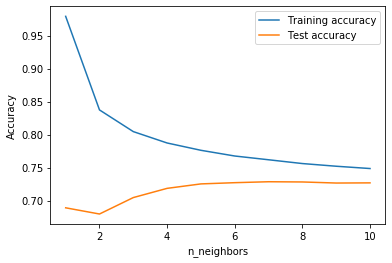

Training Accuracy:
[0.9790260438764534, 0.8373596986333072, 0.8045273574272405, 0.7872990567291085, 0.7762292306835178, 0.7675893664528128, 0.7619023129636534, 0.7561681173581558, 0.7521096097061332, 0.7486296643909881]
The best result of the measurement is:  0.9790260438764534  with the value of n_neighbors =  0  and the test accuracy is:  0.6891745950115711

Test Accuracy:
[0.6891745950115711, 0.6797891488814606, 0.7046798662895346, 0.7186294677294934, 0.7253664181023399, 0.7272177937773207, 0.7286448958601183, 0.7282977629210594, 0.7266778092054512, 0.7269349447158653]
The best result of the measurement is:  0.7286448958601183  with the value of n_neighbors =  6 and the training accuracy is:  0.7619023129636534


In [115]:
#Import the necessary libraries for the K-Nearest Neighbors and the required metrics.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#Definition of the training and test sets.
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

#Definition of the arrays of the accuracy measurements.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y1_train)
    training_accuracy.append(clf.score(XNormal_train, y1_train))
    test_accuracy.append(clf.score(XNormal_test, y1_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

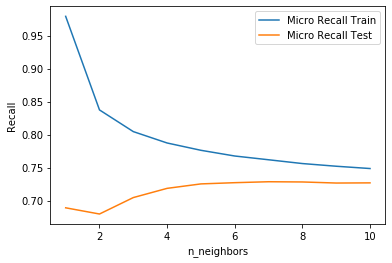

Micro Recall:
[0.9790260438764534, 0.8373596986333072, 0.8045273574272405, 0.7872990567291085, 0.7762292306835178, 0.7675893664528128, 0.7619023129636534, 0.7561681173581558, 0.7521096097061332, 0.7486296643909881]
[0.6891745950115711, 0.6797891488814606, 0.7046798662895346, 0.7186294677294934, 0.7253664181023399, 0.7272177937773207, 0.7286448958601183, 0.7282977629210594, 0.7266778092054512, 0.7269349447158653]
The best result of the training recall measurement is:  0.9790260438764534  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.7286448958601183  with the value of n_neighbors =  6


In [116]:
#Import the necessary libraries for the K-Nearest Neighbors Method, the plot libraries and the required metrics.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

#Definition of the training and test sets.
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []

neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y1_train)
    y1_pred_test = clf.predict(XNormal_test)
    y1_pred_train=clf.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='weighted'))
    
#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))    

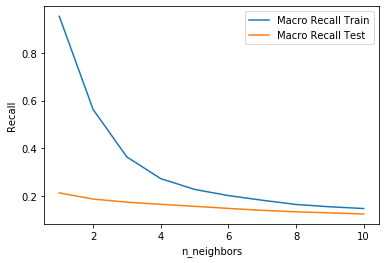

Macro Recall
[0.952401519928763, 0.5627140472899875, 0.36404748402768494, 0.27358244174597984, 0.22849762487486167, 0.20265365872646612, 0.1831602202596372, 0.16550379389081754, 0.15575734749554807, 0.14843645572226435]
[0.21377026101569965, 0.18810504891925883, 0.17514740242736218, 0.1661231560046622, 0.1577577515761903, 0.14902571723953356, 0.14088725571953042, 0.13477615195636777, 0.13025833132209802, 0.1255610023148392]
The best result of the training recall measurement is:  0.952401519928763  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.21377026101569965  with the value of n_neighbors =  0


In [117]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

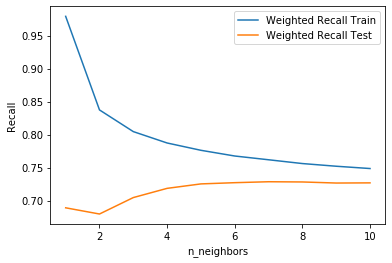

Weighted Recall:
[0.9790260438764534, 0.8373596986333072, 0.8045273574272405, 0.7872990567291085, 0.7762292306835178, 0.7675893664528128, 0.7619023129636534, 0.7561681173581558, 0.7521096097061332, 0.7486296643909881]
[0.6891745950115711, 0.6797891488814606, 0.7046798662895346, 0.7186294677294934, 0.7253664181023399, 0.7272177937773207, 0.7286448958601183, 0.7282977629210594, 0.7266778092054512, 0.7269349447158653]
The best result of the training recall measurement is:  0.9790260438764534  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.7286448958601183  with the value of n_neighbors =  6


In [118]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 3.1.2. Department without 'Bogotá DC':

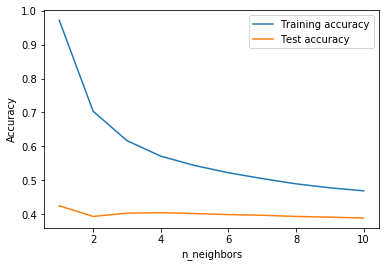

Training Accuracy:
[0.9718897201440843, 0.7038099196453311, 0.6168467719589914, 0.5710584649487392, 0.543585480742588, 0.5221390967026878, 0.5049182599057911, 0.48941535051260737, 0.477653089498476, 0.46878636741479635]
The best result of the measurement is:  0.9718897201440843  with the value of n_neighbors =  0  and the test accuracy is:  0.42458750675366774

Test Accuracy:
[0.42458750675366774, 0.3932089273097544, 0.4028095257886206, 0.40434728398653424, 0.4017289389468434, 0.39865342255101616, 0.39665849299696604, 0.3932089273097544, 0.3910477536262001, 0.3885540916836374]
The best result of the measurement is:  0.42458750675366774  with the value of n_neighbors =  0 and the training accuracy is:  0.9718897201440843


In [119]:
#Definition of the training and test sets.
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

#Definition of the arrays of the accuracy measurements.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunDep_train,y4_train)
    training_accuracy.append(clf.score(XPrunDep_train, y4_train))
    test_accuracy.append(clf.score(XPrunDep_test, y4_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

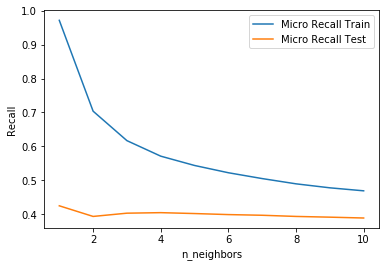

Micro Recall:
[0.9718897201440843, 0.7038099196453311, 0.6168467719589914, 0.5710584649487392, 0.543585480742588, 0.5221390967026878, 0.5049182599057911, 0.48941535051260737, 0.477653089498476, 0.46878636741479635]
[0.42458750675366774, 0.3932089273097544, 0.4028095257886206, 0.40434728398653424, 0.4017289389468434, 0.39865342255101616, 0.39665849299696604, 0.3932089273097544, 0.3910477536262001, 0.3885540916836374]
The best result of the training recall measurement is:  0.9718897201440843  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.42458750675366774  with the value of n_neighbors =  0


In [120]:
#Definition of the training and test sets.
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []

neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunDep_train,y4_train)
    y4_pred_test = clf.predict(XPrunDep_test)
    y4_pred_train=clf.predict(XPrunDep_train)
    macro_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='weighted'))
    
#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test))) 

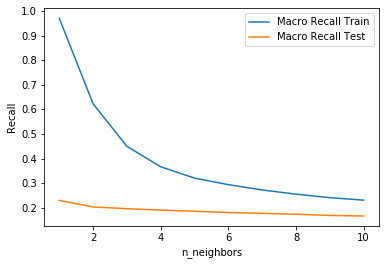

Macro Recall
[0.9708054387866552, 0.6228980339576019, 0.4497541949510612, 0.3666021371421798, 0.3205283218310405, 0.29383206978333304, 0.2722783934519102, 0.2551368699668109, 0.24092486172827562, 0.2308044188563465]
[0.2296950037083857, 0.20312827007092962, 0.19600227026907446, 0.1904633736281051, 0.1854748169263654, 0.1803300181700428, 0.17713242747373734, 0.17344021966214523, 0.16860714890597486, 0.16625798567321695]
The best result of the training recall measurement is:  0.9708054387866552  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.2296950037083857  with the value of n_neighbors =  0


In [121]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

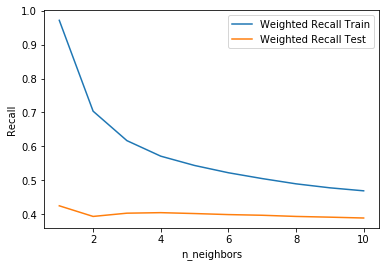

Weighted Recall:
[0.9718897201440843, 0.7038099196453311, 0.6168467719589914, 0.5710584649487392, 0.543585480742588, 0.5221390967026878, 0.5049182599057911, 0.48941535051260737, 0.477653089498476, 0.46878636741479635]
[0.42458750675366774, 0.3932089273097544, 0.4028095257886206, 0.40434728398653424, 0.4017289389468434, 0.39865342255101616, 0.39665849299696604, 0.3932089273097544, 0.3910477536262001, 0.3885540916836374]
The best result of the training recall measurement is:  0.9718897201440843  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.42458750675366774  with the value of n_neighbors =  0


In [122]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 3.2.1. Type of Process with all data:

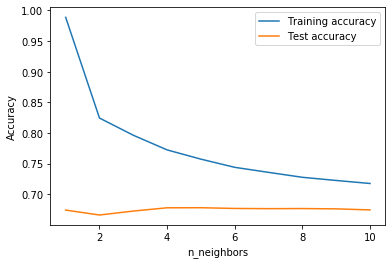

Training Accuracy:
[0.9885873221992226, 0.8243141893484531, 0.7962774870680603, 0.7723464345560284, 0.757269528621693, 0.7439283096979905, 0.735712724514329, 0.7276685652082611, 0.7224829324110621, 0.7175887236057719]
The best result of the measurement is:  0.9885873221992226  with the value of n_neighbors =  0  and the test accuracy is:  0.6741835947544356

Test Accuracy:
[0.6741835947544356, 0.6661609668295192, 0.6726022113653896, 0.6779377732064799, 0.6780534841861661, 0.6768578040627411, 0.6765235278992029, 0.6766778092054513, 0.6762021085111853, 0.6744664438158909]
The best result of the measurement is:  0.6780534841861661  with the value of n_neighbors =  4 and the training accuracy is:  0.757269528621693


In [123]:
#Definition of the training and test sets.
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

#Definition of the arrays of the accuracy measurements.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y2_train)
    training_accuracy.append(clf.score(XNormal_train, y2_train))
    test_accuracy.append(clf.score(XNormal_test, y2_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

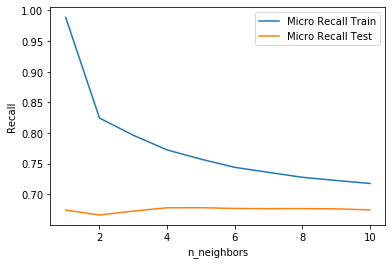

Micro Recall:
[0.9885873221992226, 0.8243141893484531, 0.7962774870680603, 0.7723464345560284, 0.757269528621693, 0.7439283096979905, 0.735712724514329, 0.7276685652082611, 0.7224829324110621, 0.7175887236057719]
[0.6741835947544356, 0.6661609668295192, 0.6726022113653896, 0.6779377732064799, 0.6780534841861661, 0.6768578040627411, 0.6765235278992029, 0.6766778092054513, 0.6762021085111853, 0.6744664438158909]
The best result of the training recall measurement is:  0.9885873221992226  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.6780534841861661  with the value of n_neighbors =  4


In [124]:
#Definition of the training and test sets.
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y2_train)
    y2_pred_test = clf.predict(XNormal_test)
    y2_pred_train=clf.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='weighted'))

#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test))) 

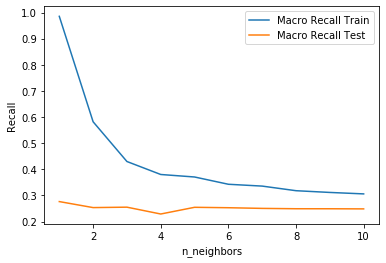

Macro Recall
[0.9858487628944604, 0.5820028623443185, 0.4297708852937624, 0.38007513752248484, 0.3704914280884609, 0.342622864692406, 0.3356138843062716, 0.31796466426470843, 0.31132313611735424, 0.3057429455460695]
[0.2762993383167459, 0.2532689597877113, 0.25490469565980695, 0.22869847299484602, 0.25438508991657566, 0.25277401420965834, 0.2502260848106203, 0.24888316917164685, 0.24879445471314274, 0.24832651163171257]
The best result of the training recall measurement is:  0.9858487628944604  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.2762993383167459  with the value of n_neighbors =  0


In [125]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

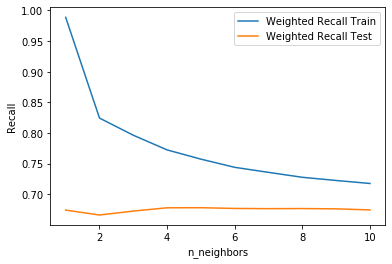

Weighted Recall:
[0.9885873221992226, 0.8243141893484531, 0.7962774870680603, 0.7723464345560284, 0.757269528621693, 0.7439283096979905, 0.735712724514329, 0.7276685652082611, 0.7224829324110621, 0.7175887236057719]
[0.6741835947544356, 0.6661609668295192, 0.6726022113653896, 0.6779377732064799, 0.6780534841861661, 0.6768578040627411, 0.6765235278992029, 0.6766778092054513, 0.6762021085111853, 0.6744664438158909]
The best result of the training recall measurement is:  0.9885873221992226  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.6780534841861661  with the value of n_neighbors =  4


In [126]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 3.2.2. Type of Process without 'Contratación directa':

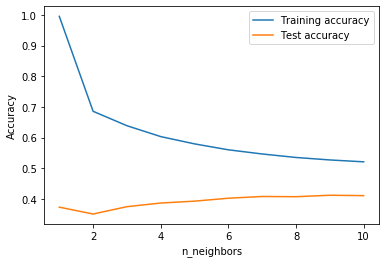

Training Accuracy:
[0.9952173602683989, 0.6857020486829896, 0.6387322435577129, 0.6032788445523116, 0.5795084112594284, 0.5602112927403812, 0.5466009945987104, 0.5352273538439575, 0.5271611107145406, 0.521045994241797]
The best result of the measurement is:  0.9952173602683989  with the value of n_neighbors =  0  and the test accuracy is:  0.37330478229835834

Test Accuracy:
[0.37330478229835834, 0.35096359743040684, 0.3748750892219843, 0.3867237687366167, 0.3928622412562455, 0.40242683797287654, 0.40806566738044253, 0.4073518915060671, 0.412062812276945, 0.4109207708779443]
The best result of the measurement is:  0.412062812276945  with the value of n_neighbors =  8 and the training accuracy is:  0.5271611107145406


In [127]:
#Definition of the training and test sets.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunCon,y5, stratify=y5,random_state=66)

#Define the lists for the accuracy measurements.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunProc_train,y5_train)
    training_accuracy.append(clf.score(XPrunProc_train, y5_train))
    test_accuracy.append(clf.score(XPrunProc_test, y5_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

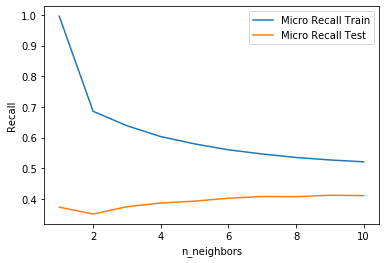

Micro Recall:
[0.9952173602683989, 0.6857020486829896, 0.6387322435577129, 0.6032788445523116, 0.5795084112594284, 0.5602112927403812, 0.5466009945987104, 0.5352273538439575, 0.5271611107145406, 0.521045994241797]
[0.37330478229835834, 0.35096359743040684, 0.3748750892219843, 0.3867237687366167, 0.3928622412562455, 0.40242683797287654, 0.40806566738044253, 0.4073518915060671, 0.412062812276945, 0.4109207708779443]
The best result of the training recall measurement is:  0.9952173602683989  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.412062812276945  with the value of n_neighbors =  8


In [128]:
#Definition of the training and test sets.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunProc_train,y5_train)
    y5_pred_test = clf.predict(XPrunProc_test)
    y5_pred_train=clf.predict(XPrunProc_train)
    macro_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='weighted'))
    
#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test))) 

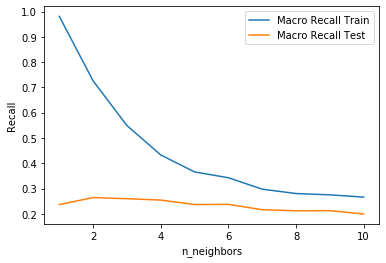

Macro Recall
[0.9810268857150128, 0.7257680585844887, 0.54907226603821, 0.43291481569715184, 0.36578865746231565, 0.3427119137792221, 0.2975531789182406, 0.2802763304008234, 0.27503289991967583, 0.26609711548918696]
[0.23644956219592494, 0.26444507861892147, 0.2597948347633923, 0.2543803946505443, 0.23677044060022256, 0.23749697866325814, 0.21631108809408928, 0.21208328003289922, 0.212562563988708, 0.1993214058213898]
The best result of the training recall measurement is:  0.9810268857150128  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.26444507861892147  with the value of n_neighbors =  1


In [129]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

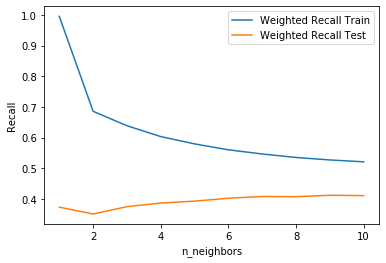

Weighted Recall:
[0.9952173602683989, 0.6857020486829896, 0.6387322435577129, 0.6032788445523116, 0.5795084112594284, 0.5602112927403812, 0.5466009945987104, 0.5352273538439575, 0.5271611107145406, 0.521045994241797]
[0.37330478229835834, 0.35096359743040684, 0.3748750892219843, 0.3867237687366167, 0.3928622412562455, 0.40242683797287654, 0.40806566738044253, 0.4073518915060671, 0.412062812276945, 0.4109207708779443]
The best result of the training recall measurement is:  0.9952173602683989  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.412062812276945  with the value of n_neighbors =  8


In [130]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 3.3.1. Type of Contract with all data:

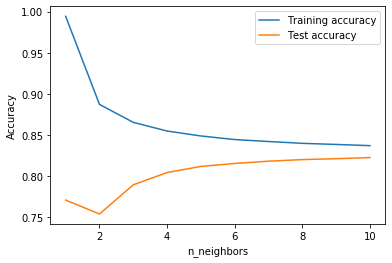

Training Accuracy:
[0.9942958039230813, 0.8872489146599125, 0.8654135435014593, 0.8548837089702876, 0.8488923745483999, 0.8445424429044687, 0.8421767657936804, 0.8399482293849668, 0.8385939649519794, 0.8371239880516164]
The best result of the measurement is:  0.9942958039230813  with the value of n_neighbors =  0  and the test accuracy is:  0.77095654409874

Test Accuracy:
[0.77095654409874, 0.7540498842890203, 0.7895345847261507, 0.8044741578812034, 0.8118925173566469, 0.815479557726922, 0.8182566212393931, 0.8201722807919773, 0.8212779634867575, 0.8226407816919517]
The best result of the measurement is:  0.8226407816919517  with the value of n_neighbors =  9 and the training accuracy is:  0.8371239880516164


In [132]:
#Definition of the training and test sets.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)

#Definition of the arrays of the accuracy measurements.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y3_train)
    training_accuracy.append(clf.score(XNormal_train, y3_train))
    test_accuracy.append(clf.score(XNormal_test, y3_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

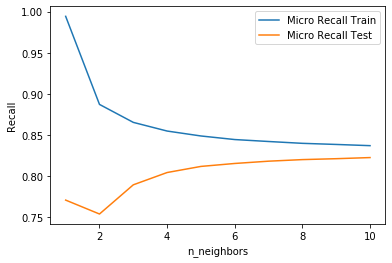

Micro Recall:
[0.9942958039230813, 0.8872489146599125, 0.8654135435014593, 0.8548837089702876, 0.8488923745483999, 0.8445424429044687, 0.8421767657936804, 0.8399482293849668, 0.8385939649519794, 0.8371239880516164]
[0.77095654409874, 0.7540498842890203, 0.7895345847261507, 0.8044741578812034, 0.8118925173566469, 0.815479557726922, 0.8182566212393931, 0.8201722807919773, 0.8212779634867575, 0.8226407816919517]
The best result of the training recall measurement is:  0.9942958039230813  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.8226407816919517  with the value of n_neighbors =  9


In [136]:
#Definition of the training and test sets.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XNormal_train,y3_train)
    y3_pred_test = clf.predict(XNormal_test)
    y3_pred_train=clf.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='weighted'))

    
#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test))) 

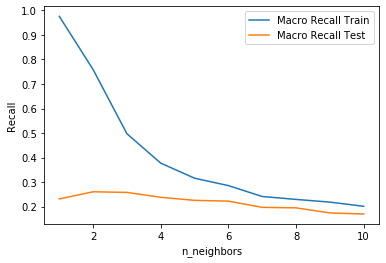

Macro Recall
[0.9758643777145669, 0.7588799727646838, 0.4973080752348049, 0.3775328982709114, 0.3160653834914002, 0.28591066279850874, 0.2415294946702699, 0.22964747527031557, 0.21867245415002157, 0.2016267762805002]
[0.2314664399121613, 0.26079944689127255, 0.2581642772252793, 0.2383189380522343, 0.22578744855014185, 0.22266481284045578, 0.19726009133499517, 0.1952655681951207, 0.17456561178168156, 0.1701424423749402]
The best result of the training recall measurement is:  0.9758643777145669  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.26079944689127255  with the value of n_neighbors =  1


In [137]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

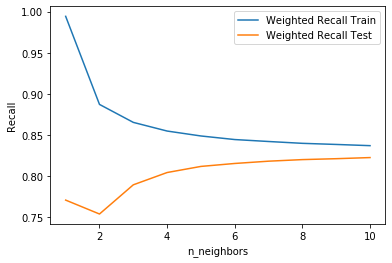

Weighted Recall:
[0.9942958039230813, 0.8872489146599125, 0.8654135435014593, 0.8548837089702876, 0.8488923745483999, 0.8445424429044687, 0.8421767657936804, 0.8399482293849668, 0.8385939649519794, 0.8371239880516164]
[0.77095654409874, 0.7540498842890203, 0.7895345847261507, 0.8044741578812034, 0.8118925173566469, 0.815479557726922, 0.8182566212393931, 0.8201722807919773, 0.8212779634867575, 0.8226407816919517]
The best result of the training recall measurement is:  0.9942958039230813  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.8226407816919517  with the value of n_neighbors =  9


In [138]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 3.3.2. Type of Contract without 'Prestación de servicios':

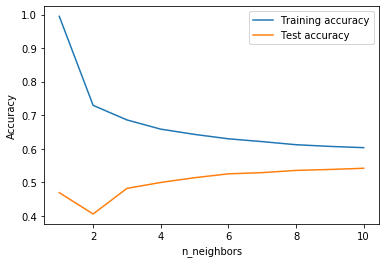

Training Accuracy:
[0.9948604468555928, 0.7296975753682157, 0.686201727460918, 0.6587431889023723, 0.6431103814214671, 0.6299997620577248, 0.6216003997430224, 0.6123682394651058, 0.6073714516858211, 0.6035881695100769]
The best result of the measurement is:  0.9948604468555928  with the value of n_neighbors =  0  and the test accuracy is:  0.46952177016416846

Test Accuracy:
[0.46952177016416846, 0.4059243397573162, 0.48222698072805137, 0.4999286224125625, 0.5140613847251962, 0.5256245538900786, 0.5291934332619558, 0.5358315488936474, 0.5386152748037116, 0.5421841541755889]
The best result of the measurement is:  0.5421841541755889  with the value of n_neighbors =  9 and the training accuracy is:  0.6035881695100769


In [139]:
#Definition of the training and test sets.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

#Define the lists for the accuracy measurement.
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunCon_train,y6_train)
    training_accuracy.append(clf.score(XPrunCon_train, y6_train))
    test_accuracy.append(clf.score(XPrunCon_test, y6_test))

#Method for the creation of the plot for the accuracy.
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(training_accuracy)
print("The best result of the measurement is: ",max(training_accuracy)," with the value of n_neighbors = ",training_accuracy.index(max(training_accuracy))," and the test accuracy is: ",test_accuracy[training_accuracy.index(max(training_accuracy))])
print("")
print("Test Accuracy:")
print(test_accuracy)
print("The best result of the measurement is: ",max(test_accuracy)," with the value of n_neighbors = ",test_accuracy.index(max(test_accuracy)), "and the training accuracy is: ",training_accuracy[test_accuracy.index(max(test_accuracy))])

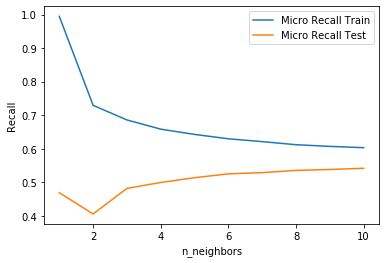

Micro Recall:
[0.9948604468555928, 0.7296975753682157, 0.686201727460918, 0.6587431889023723, 0.6431103814214671, 0.6299997620577248, 0.6216003997430224, 0.6123682394651058, 0.6073714516858211, 0.6035881695100769]
[0.46952177016416846, 0.4059243397573162, 0.48222698072805137, 0.4999286224125625, 0.5140613847251962, 0.5256245538900786, 0.5291934332619558, 0.5358315488936474, 0.5386152748037116, 0.5421841541755889]
The best result of the training recall measurement is:  0.9948604468555928  with the value of n_neighbors =  0
The best result of the test recall measurement is:  0.5421841541755889  with the value of n_neighbors =  9


In [141]:
#Definition of the training and test sets.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
neighbors_settings = range(1,11)

#Method for the selection of the optimal number of neighbors setting.
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(XPrunCon_train,y6_train)
    y6_pred_test = clf.predict(XPrunCon_test)
    y6_pred_train=clf.predict(XPrunCon_train)
    macro_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='weighted'))

#Method for the creation of the plot for the recall.
plt.plot(neighbors_settings, micro_recall_train, label='Micro Recall Train')
plt.plot(neighbors_settings, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test))) 

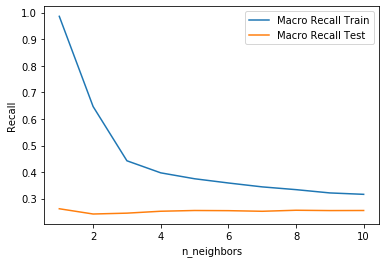

Macro Recall
[0.9861840567785352, 0.6466737378897671, 0.4425124283642127, 0.397136227195961, 0.3748860107915396, 0.3589709066648932, 0.3442955691734695, 0.3338986917780314, 0.3215451568773159, 0.31626299757513276]
[0.2619897085481035, 0.24219981037024527, 0.24543477133026056, 0.2526125546737096, 0.2554311206843377, 0.25480919209846914, 0.25246453840364663, 0.2563378197918225, 0.2551334445610974, 0.25542361690714116]
The best result of the training recall measurement is:  0.9861840567785352  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.2619897085481035  with the value of n_neighbors =  0


In [142]:
#Plot for the recall scores.
plt.plot(neighbors_settings, macro_recall_train, label='Macro Recall Train')
plt.plot(neighbors_settings, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

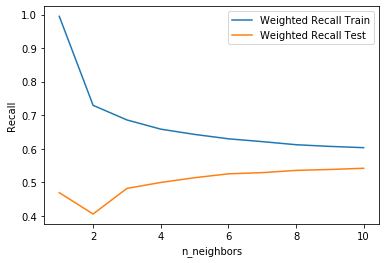

Weighted Recall:
[0.9948604468555928, 0.7296975753682157, 0.686201727460918, 0.6587431889023723, 0.6431103814214671, 0.6299997620577248, 0.6216003997430224, 0.6123682394651058, 0.6073714516858211, 0.6035881695100769]
[0.46952177016416846, 0.4059243397573162, 0.48222698072805137, 0.4999286224125625, 0.5140613847251962, 0.5256245538900786, 0.5291934332619558, 0.5358315488936474, 0.5386152748037116, 0.5421841541755889]
The best result of the training recall measurement is:  0.9948604468555928  with the value of n_neighbors =  0
The best result of the training recall measurement is:  0.5421841541755889  with the value of n_neighbors =  9


In [143]:
#Plot for the recall scores.
plt.plot(neighbors_settings, weighted_recall_train, label='Weighted Recall Train')
plt.plot(neighbors_settings, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

## 4. Naives Bayes:

Now we analyze the predictions for the different features of interest using the Naive Bayes method. We use the Gaussian NB as we use the different values of the contracts for the features which are continuous data points.

### 4.1.1. Department with all the data:

In [109]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


# Create train and test sets
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y1_train)

# Predict the labels of the test set: y_pred
y1_pred_train = cv.predict(XNormal_train)
y1_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y1_train,y1_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y1_test,y1_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.6901862970724746
Test Accuracy:  0.6901131396245822

Macro Scores:
Train Recall:  0.02980978354756046
Test Recall:  0.029671948294656105

Micro Scores:
Train Recall:  0.6901862970724746
Test Recall:  0.6901131396245822

Weighted Scores:
Train Recall:  0.6901862970724746
Test Recall:  0.6901131396245822
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


### 4.1.2. Department without 'Bogotá DC':

In [112]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score



#Method of the Naive Bayes algorithm using a Gaussian distribution.
gnb=GaussianNB()
gnb.fit(XPrunDep_train,y4_train)
y4_pred_train = gnb.predict(XPrunDep_train)
y4_pred_test = gnb.predict(XPrunDep_test)



#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


#Definition of the training and test sets.
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunDep_train,y4_train)

# Predict the labels of the test set: y_pred
y4_pred_train = cv.predict(XPrunDep_train)
y4_pred_test = cv.predict(XPrunDep_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y4_train,y4_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y4_test,y4_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.16271820448877805
Test Accuracy:  0.16208802626657245

Macro Scores:
Train Recall:  0.03100604444884688
Test Recall:  0.030742466855069928

Micro Scores:
Train Recall:  0.16271820448877805
Test Recall:  0.16208802626657245

Weighted Scores:
Train Recall:  0.16271820448877805
Test Recall:  0.16208802626657245
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


### 4.2.1. Type of Process with all Data:

In [113]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


# Create train and test sets
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y2_train)

# Predict the labels of the test set: y_pred
y2_pred_train = cv.predict(XNormal_train)
y2_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y2_train,y2_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y2_test,y2_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.6030205239631948
Test Accuracy:  0.6029184880431988

Macro Scores:
Train Recall:  0.07593910022411794
Test Recall:  0.073019284529762

Micro Scores:
Train Recall:  0.6030205239631948
Test Recall:  0.6029184880431988

Weighted Scores:
Train Recall:  0.6030205239631948
Test Recall:  0.6029184880431988
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


### 4.2.2. Type of Process without 'Contratación directa':

In [114]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


#Definition of the training and test sets.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunProc_train,y5_train)

# Predict the labels of the test set: y_pred
y5_pred_train = cv.predict(XPrunProc_train)
y5_pred_test = cv.predict(XPrunProc_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y5_train,y5_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y5_test,y5_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_scorel_score(y5_train,y5_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='weighted')) 
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.30273395674209436
Test Accuracy:  0.3036402569593148

Macro Scores:
Train Recall:  0.09241130449640814
Test Recall:  0.0696861612677443

Micro Scores:
Train Recall:  0.30273395674209436
Test Recall:  0.3036402569593148

Weighted Scores:
Train Recall:  0.30273395674209436
Test Recall:  0.3036402569593148
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


### 4.3.1. Type of Contracts with all Data:

In [115]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


#Definition of the training and test sets.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y3_train)

# Predict the labels of the test set: y_pred
y3_pred_train = cv.predict(XNormal_train)
y3_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y3_train,y3_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y3_test,y3_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.8197499753575301
Test Accuracy:  0.8201079969143739

Macro Scores:
Train Recall:  0.08071614606424175
Test Recall:  0.07520905680908016

Micro Scores:
Train Recall:  0.8197499753575301
Test Recall:  0.8201079969143739

Weighted Scores:
Train Recall:  0.8197499753575301
Test Recall:  0.8201079969143739
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


### 4.3.2. Type of Contract without 'Prestación de servicios':

In [116]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('gaussiannb', GaussianNB())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'gaussiannb__var_smoothing':[0.0001,0.001,1,10]}


#Definition of the training and test sets.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunCon_train,y6_train)

# Predict the labels of the test set: y_pred
y6_pred_train = cv.predict(XPrunCon_train)
y6_pred_test = cv.predict(XPrunCon_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y6_train,y6_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y6_test,y6_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.3236919954222539
Test Accuracy:  0.32204048582995953

Macro Scores:
Train Recall:  0.08275982742603308
Test Recall:  0.07971633546233832

Micro Scores:
Train Recall:  0.3236919954222539
Test Recall:  0.32204048582995953

Weighted Scores:
Train Recall:  0.3236919954222539
Test Recall:  0.32204048582995953
Tuned Model Parameters: {'gaussiannb__var_smoothing': 10}


## 5. SVM:

### 5.1.1. Departments with all Data:

In [155]:
#Import the libraries for the SVM methods.
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Setup the pipeline


steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y1_train)

# Predict the labels of the test set: y_pred
y1_pred_train = cv.predict(XNormal_train)
y1_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y1_train,y1_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y1_test,y1_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.6911505676339372
Test Accuracy:  0.6906916945230136

Macro Scores:
Train Recall:  0.03015953922920685
Test Recall:  0.029604443123572622

Micro Scores:
Train Recall:  0.6911505676339372
Test Recall:  0.6906916945230136

Weighted Scores:
Train Recall:  0.6911505676339372
Test Recall:  0.6906916945230136
Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### 5.1.2. Department without 'Bogotá DC':

In [156]:
#Import the libraries for the SVM methods.
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Setup the pipeline


steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunDep_train,y4_train)

# Predict the labels of the test set: y_pred
y4_pred_train = cv.predict(XPrunDep_train)
y4_pred_test = cv.predict(XPrunDep_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y4_train,y4_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y4_test,y4_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.2530756442227764
Test Accuracy:  0.25547566601554383

Macro Scores:
Train Recall:  0.05183481627837531
Test Recall:  0.051194226785170265

Micro Scores:
Train Recall:  0.2530756442227764
Test Recall:  0.25547566601554383

Weighted Scores:
Train Recall:  0.2530756442227764
Test Recall:  0.25547566601554383
Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1}


### 5.2.1. Type of Process with all Data:

In [157]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Setup the pipeline


steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y2_train)

# Predict the labels of the test set: y_pred
y2_pred_train = cv.predict(XNormal_train)
y2_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y2_train,y2_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y2_test,y2_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.6082918696991905
Test Accuracy:  0.6070069426587812

Macro Scores:
Train Recall:  0.1119602623134865
Test Recall:  0.0995149925269758

Micro Scores:
Train Recall:  0.6082918696991905
Test Recall:  0.6070069426587812

Weighted Scores:
Train Recall:  0.6082918696991905
Test Recall:  0.6070069426587812
Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1}


### 5.2.2. Type of Process without 'Contratación directa':

In [158]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunProc_train,y5_train)

# Predict the labels of the test set: y_pred
y5_pred_train = cv.predict(XPrunProc_train)
y5_pred_test = cv.predict(XPrunProc_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y5_train,y5_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y5_test,y5_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.44990125395579034
Test Accuracy:  0.44732334047109207

Macro Scores:
Train Recall:  0.14994319238275722
Test Recall:  0.11517713732123425

Micro Scores:
Train Recall:  0.44990125395579034
Test Recall:  0.44732334047109207

Weighted Scores:
Train Recall:  0.44990125395579034
Test Recall:  0.44732334047109207
Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1}


### 5.3.1. Type of Contracts with all the Data:

In [159]:
#
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Setup the pipeline


steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y3_train)

# Predict the labels of the test set: y_pred
y3_pred_train = cv.predict(XNormal_train)
y3_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y3_train,y3_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y3_test,y3_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.8214942336620424
Test Accuracy:  0.8211365389560298

Macro Scores:
Train Recall:  0.0949340473433123
Test Recall:  0.056633447475415884

Micro Scores:
Train Recall:  0.8214942336620424
Test Recall:  0.8211365389560298

Weighted Scores:
Train Recall:  0.8214942336620424
Test Recall:  0.8211365389560298
Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1}


### 5.3.2. Type of Contract without 'Prestación de servicios':

In [160]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Setup the pipeline


steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 20],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunCon_train,y6_train)

# Predict the labels of the test set: y_pred
y6_pred_train = cv.predict(XPrunCon_train)
y6_pred_test = cv.predict(XPrunCon_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y6_train,y6_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y6_test,y6_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training Accuracy:  0.5050324791205654
Test Accuracy:  0.49971448965024984

Macro Scores:
Train Recall:  0.20141891825815536
Test Recall:  0.19372969492785533

Micro Scores:
Train Recall:  0.5050324791205654
Test Recall:  0.49971448965024984

Weighted Scores:
Train Recall:  0.5050324791205654
Test Recall:  0.49971448965024984
Tuned Model Parameters: {'SVM__C': 20, 'SVM__gamma': 0.1}


## 6. Decision Trees:

### 6.1.1. Departments with all the Data:

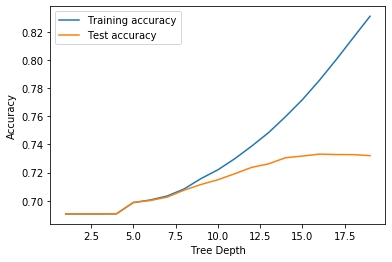

Training Accuracy:
[0.6906577182358563, 0.6906577182358563, 0.6906577182358563, 0.6907091459991342, 0.6987233057766236, 0.700540420079113, 0.7033475188247041, 0.7083488688034902, 0.715728752833884, 0.7219643691313422, 0.7298499595006365, 0.7387855333701899, 0.7483853825154176, 0.7596909191426992, 0.7717850148069102, 0.7854348003102808, 0.8002159966057676, 0.8156657538238685, 0.831021226809293]
The best result of the measurement is:  0.831021226809293  with the value of tree depth =  18  and the test accuracy is:  0.7320390845975829

Test Accuracy:
[0.6906659809719722, 0.6906659809719722, 0.6906659809719722, 0.690717408074055, 0.6988171766520956, 0.7001414245307277, 0.7025842118796606, 0.7075083569040884, 0.7115453844175881, 0.7149138596040113, 0.7191823090768835, 0.723695037284649, 0.7262149652867061, 0.7305348418616611, 0.7317433787606068, 0.7331061969658009, 0.7328233479043456, 0.7327590640267421, 0.7320390845975829]
The best result of the measurement is:  0.7331061969658009  with th

In [165]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XNormal_train, y1_train)
    y1_pred_test = tree.predict(XNormal_test)
    y1_pred_train=tree.predict(XNormal_train)
    listDepthsTrain.append(tree.score(XNormal_train,y1_train))
    listDepthsTest.append(tree.score(XNormal_test,y1_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

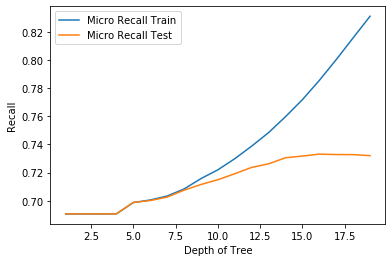

Micro Recall:
[0.6906577182358563, 0.6906577182358563, 0.6906577182358563, 0.6907091459991342, 0.6987233057766236, 0.700540420079113, 0.7033475188247041, 0.7083488688034902, 0.715728752833884, 0.7219643691313422, 0.7298499595006365, 0.7387855333701899, 0.7483853825154176, 0.7596909191426992, 0.7717850148069102, 0.7854348003102808, 0.8002159966057676, 0.8156657538238685, 0.831021226809293]
[0.6906659809719722, 0.6906659809719722, 0.6906659809719722, 0.690717408074055, 0.6988171766520956, 0.7001414245307277, 0.7025842118796606, 0.7075083569040884, 0.7115453844175881, 0.7149138596040113, 0.7191823090768835, 0.723695037284649, 0.7262149652867061, 0.7305348418616611, 0.7317433787606068, 0.7331061969658009, 0.7328233479043456, 0.7327590640267421, 0.7320390845975829]
The best result of the training recall measurement is:  0.831021226809293  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.7331061969658009  with the value of n_neighbors =  15


In [166]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)


#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []


#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XNormal_train, y1_train)
    y1_pred_test = tree.predict(XNormal_test)
    y1_pred_train=tree.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y1_test,y1_pred_test,average='weighted'))

#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))


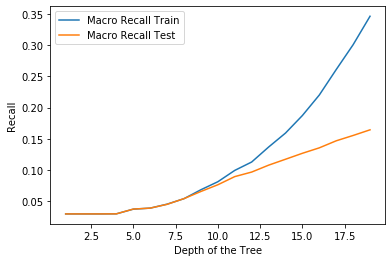

Macro Recall
[0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029572006325960184, 0.03707380505105738, 0.038706637702193306, 0.04508983812194676, 0.053892516016920584, 0.06823795336199315, 0.08105297464367965, 0.09925600276249015, 0.11270850822275534, 0.136689242596282, 0.15914526878205648, 0.18734331126600542, 0.22022963847590984, 0.2611119724837905, 0.30097552381649123, 0.3466627703327858]
[0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029518407939476164, 0.037179555741317184, 0.0387136138795007, 0.04480312796559799, 0.05399056469516043, 0.06544094236630317, 0.07620575719216041, 0.08929571854996798, 0.09658582477573249, 0.10764146449190685, 0.1171381673142185, 0.1267103279271136, 0.13545413132732198, 0.14675722389636453, 0.15531982905473232, 0.1643735270869543]
The best result of the training recall measurement is:  0.3466627703327858  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.16437352708695

In [167]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

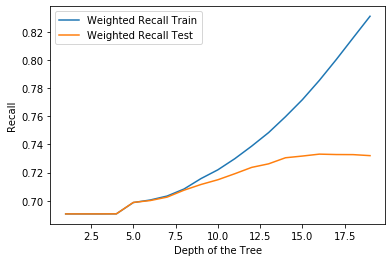

Weighted Recall:
[0.6906577182358563, 0.6906577182358563, 0.6906577182358563, 0.6907091459991342, 0.6987233057766236, 0.700540420079113, 0.7033475188247041, 0.7083488688034902, 0.715728752833884, 0.7219643691313422, 0.7298499595006365, 0.7387855333701899, 0.7483853825154176, 0.7596909191426992, 0.7717850148069102, 0.7854348003102808, 0.8002159966057676, 0.8156657538238685, 0.831021226809293]
[0.6906659809719722, 0.6906659809719722, 0.6906659809719722, 0.690717408074055, 0.6988171766520956, 0.7001414245307277, 0.7025842118796606, 0.7075083569040884, 0.7115453844175881, 0.7149138596040113, 0.7191823090768835, 0.723695037284649, 0.7262149652867061, 0.7305348418616611, 0.7317433787606068, 0.7331061969658009, 0.7328233479043456, 0.7327590640267421, 0.7320390845975829]
The best result of the training recall measurement is:  0.831021226809293  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.7331061969658009  with the value of n_neighbors =  15


In [168]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 6.1.2. Department without 'Bogotá DC':

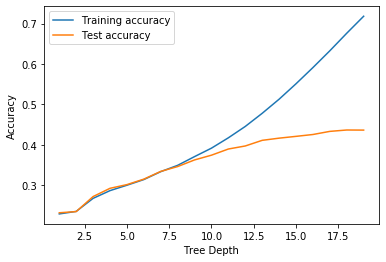

Training Accuracy:
[0.2284566361873095, 0.23469105015239677, 0.26702687725131613, 0.2861873095040177, 0.29955666389581603, 0.3135771681906345, 0.33318093654752007, 0.34886395123302855, 0.37050429481850927, 0.39142421723469106, 0.4170961485175949, 0.4452618453865337, 0.4777777777777778, 0.5127320587420338, 0.5509697977279024, 0.5911194236630646, 0.6327098919368246, 0.676212247159878, 0.7182876142975894]
The best result of the measurement is:  0.7182876142975894  with the value of tree depth =  18  and the test accuracy is:  0.43614147375420803

Test Accuracy:
[0.2312871451726861, 0.23423797847138522, 0.27147666348032085, 0.2919246914093346, 0.30106811853206433, 0.31461701508665474, 0.33381821204438716, 0.34582935040106394, 0.3622459581896014, 0.37400773035202195, 0.3893021902664062, 0.3968247371264702, 0.4107892440048211, 0.41619217821370685, 0.4206392086779436, 0.42525248327168447, 0.4329828352936287, 0.43639083994846434, 0.43614147375420803]
The best result of the measurement is:  0.4

In [131]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XPrunDep_train, XprunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XPrunDep_train, y4_train)
    y4_pred_test = tree.predict(XPrunDep_test)
    y4_pred_train=tree.predict(XPrunDep_train)
    macro_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y4_test,y4_pred_test,average='weighted'))
    listDepthsTrain.append(tree.score(XPrunDep_train,y4_train))
    listDepthsTest.append(tree.score(XPrunDep_test,y4_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

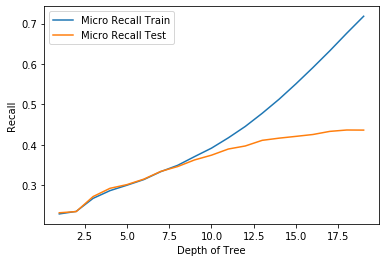

Micro Recall:
[0.2284566361873095, 0.23469105015239677, 0.26702687725131613, 0.2861873095040177, 0.29955666389581603, 0.3135771681906345, 0.33318093654752007, 0.34886395123302855, 0.37050429481850927, 0.39142421723469106, 0.4170961485175949, 0.4452618453865337, 0.4777777777777778, 0.5127320587420338, 0.5509697977279024, 0.5911194236630646, 0.6327098919368246, 0.676212247159878, 0.7182876142975894]
[0.2312871451726861, 0.23423797847138522, 0.27147666348032085, 0.2919246914093346, 0.30106811853206433, 0.31461701508665474, 0.33381821204438716, 0.34582935040106394, 0.3622459581896014, 0.37400773035202195, 0.3893021902664062, 0.3968247371264702, 0.4107892440048211, 0.41619217821370685, 0.4206392086779436, 0.42525248327168447, 0.4329828352936287, 0.43639083994846434, 0.43614147375420803]
The best result of the training recall measurement is:  0.7182876142975894  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.43639083994846434  with the value of n_ne

In [132]:
#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))

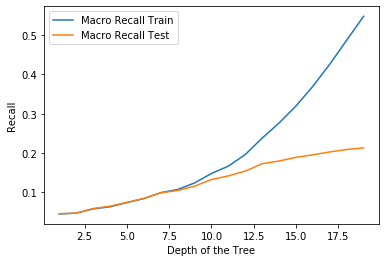

Macro Recall
[0.044207890683664916, 0.0461230282035688, 0.056923047911665775, 0.062391571581885255, 0.0731523366737064, 0.08335400211995325, 0.09848541877346778, 0.10652771857428361, 0.12326086322502526, 0.14743552549207467, 0.16619628178204016, 0.1957861212908173, 0.23779672914679367, 0.27631583606609966, 0.3197146302777538, 0.370157911966554, 0.42641933554083655, 0.4877658180305713, 0.5486568124992889]
[0.044776536151440845, 0.04601422547563024, 0.058005102231125615, 0.06385779770461952, 0.07363562528679816, 0.08377655614884624, 0.09803413851747651, 0.10389536195211403, 0.11509394897924206, 0.1320206489602811, 0.14123554969344174, 0.15349751228062775, 0.17237160275948968, 0.17926410158143932, 0.18848848273819963, 0.19504103344651408, 0.2023813082614452, 0.20859185002580402, 0.21271787851886795]
The best result of the training recall measurement is:  0.5486568124992889  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.21271787851886795  wit

In [133]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

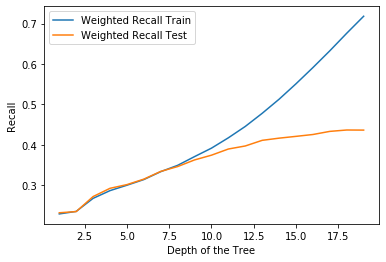

Weighted Recall:
[0.2284566361873095, 0.23469105015239677, 0.26702687725131613, 0.2861873095040177, 0.29955666389581603, 0.3135771681906345, 0.33318093654752007, 0.34886395123302855, 0.37050429481850927, 0.39142421723469106, 0.4170961485175949, 0.4452618453865337, 0.4777777777777778, 0.5127320587420338, 0.5509697977279024, 0.5911194236630646, 0.6327098919368246, 0.676212247159878, 0.7182876142975894]
[0.2312871451726861, 0.23423797847138522, 0.27147666348032085, 0.2919246914093346, 0.30106811853206433, 0.31461701508665474, 0.33381821204438716, 0.34582935040106394, 0.3622459581896014, 0.37400773035202195, 0.3893021902664062, 0.3968247371264702, 0.4107892440048211, 0.41619217821370685, 0.4206392086779436, 0.42525248327168447, 0.4329828352936287, 0.43639083994846434, 0.43614147375420803]
The best result of the training recall measurement is:  0.7182876142975894  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.43639083994846434  with the value 

In [134]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 6.2.1. Type of Process with all the Data:

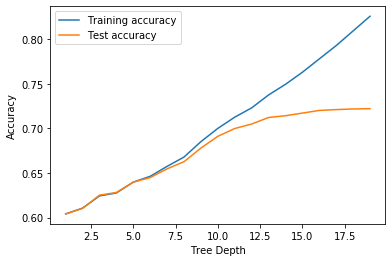

Training Accuracy:
[0.6040662218165143, 0.6105504056364829, 0.6242216193745527, 0.6275687096345629, 0.6397142330620519, 0.6462284164105992, 0.6573710984541672, 0.6678195056934819, 0.6850906628610122, 0.6999190012728371, 0.7125102319820689, 0.7229157827519853, 0.7373798411739244, 0.7493110822544217, 0.7628322983495973, 0.7778020631104369, 0.7927375426957577, 0.8091472848283813, 0.8255998834304032]
The best result of the measurement is:  0.8255998834304032  with the value of tree depth =  18  and the test accuracy is:  0.7220493700179995

Test Accuracy:
[0.604062741064541, 0.6102468500899975, 0.6250835690408846, 0.6280534841861661, 0.6396760092568784, 0.6447672923630754, 0.6546155824119311, 0.6625867832347647, 0.6778992028799177, 0.6910516842375932, 0.6997814348161481, 0.7048212908202622, 0.7121496528670609, 0.7141038827462073, 0.7170609411159681, 0.720056569812291, 0.7209694008742608, 0.7216636667523785, 0.7220493700179995]
The best result of the measurement is:  0.7220493700179995  wit

In [139]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XNormal_train, y2_train)
    y2_pred_test = tree.predict(XNormal_test)
    y2_pred_train=tree.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y2_test,y2_pred_test,average='weighted'))
    listDepthsTrain.append(tree.score(XNormal_train,y2_train))
    listDepthsTest.append(tree.score(XNormal_test,y2_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

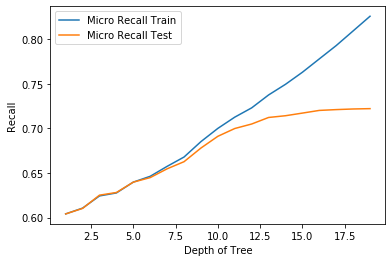

Micro Recall:
[0.6040662218165143, 0.6105504056364829, 0.6242216193745527, 0.6275687096345629, 0.6397142330620519, 0.6462284164105992, 0.6573710984541672, 0.6678195056934819, 0.6850906628610122, 0.6999190012728371, 0.7125102319820689, 0.7229157827519853, 0.7373798411739244, 0.7493110822544217, 0.7628322983495973, 0.7778020631104369, 0.7927375426957577, 0.8091472848283813, 0.8255998834304032]
[0.604062741064541, 0.6102468500899975, 0.6250835690408846, 0.6280534841861661, 0.6396760092568784, 0.6447672923630754, 0.6546155824119311, 0.6625867832347647, 0.6778992028799177, 0.6910516842375932, 0.6997814348161481, 0.7048212908202622, 0.7121496528670609, 0.7141038827462073, 0.7170609411159681, 0.720056569812291, 0.7209694008742608, 0.7216636667523785, 0.7220493700179995]
The best result of the training recall measurement is:  0.8255998834304032  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.7220493700179995  with the value of n_neighbors =  18


In [140]:
#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))

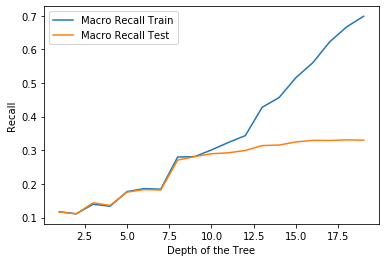

Macro Recall
[0.11732850297587423, 0.11105132112248382, 0.1394219204961646, 0.13350319387655726, 0.17690510162879308, 0.1860589044867716, 0.18430369815735767, 0.27989830458807613, 0.28105155887102196, 0.30097294121405155, 0.32317646729991406, 0.3435682232618415, 0.427943425734061, 0.4568726864119914, 0.5163081328973901, 0.5607594949659853, 0.6229559611906513, 0.6671016414330929, 0.6985927965699651]
[0.11661464251332732, 0.11075113655257009, 0.14384903541911193, 0.1360515906389784, 0.17547408678483042, 0.1830489541861639, 0.18186917855004944, 0.2707868931105696, 0.28107805192500873, 0.28967434294433836, 0.29256294196060845, 0.29933022212949634, 0.31399919662255416, 0.3155347780706716, 0.3248282297227826, 0.32959972886445693, 0.3290993538378231, 0.3309291401925688, 0.3300739785549002]
The best result of the training recall measurement is:  0.6985927965699651  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.3309291401925688  with the value of 

In [141]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

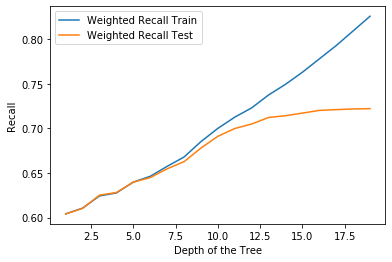

Weighted Recall:
[0.6040662218165143, 0.6105504056364829, 0.6242216193745527, 0.6275687096345629, 0.6397142330620519, 0.6462284164105992, 0.6573710984541672, 0.6678195056934819, 0.6850906628610122, 0.6999190012728371, 0.7125102319820689, 0.7229157827519853, 0.7373798411739244, 0.7493110822544217, 0.7628322983495973, 0.7778020631104369, 0.7927375426957577, 0.8091472848283813, 0.8255998834304032]
[0.604062741064541, 0.6102468500899975, 0.6250835690408846, 0.6280534841861661, 0.6396760092568784, 0.6447672923630754, 0.6546155824119311, 0.6625867832347647, 0.6778992028799177, 0.6910516842375932, 0.6997814348161481, 0.7048212908202622, 0.7121496528670609, 0.7141038827462073, 0.7170609411159681, 0.720056569812291, 0.7209694008742608, 0.7216636667523785, 0.7220493700179995]
The best result of the training recall measurement is:  0.8255998834304032  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.7220493700179995  with the value of n_neighbors =  18

In [142]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 6.2.2. Type of Process without 'Contratación directa':

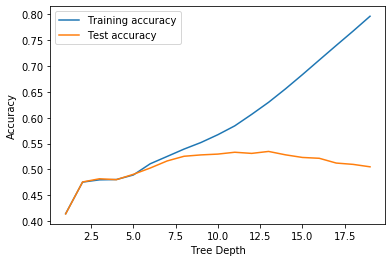

Training Accuracy:
[0.41447164917790946, 0.47555143122278537, 0.47995336331406, 0.4805244247745497, 0.4893044947295786, 0.5110286244557071, 0.5252099840578676, 0.5394389321150689, 0.5521688438384847, 0.567278178313941, 0.5844100221286316, 0.6066338306326885, 0.6299759678302044, 0.6560068527375259, 0.6835129797511124, 0.7118281105003926, 0.7400004758845504, 0.7678397220834225, 0.7965355604730292]
The best result of the measurement is:  0.7965355604730292  with the value of tree depth =  18  and the test accuracy is:  0.5051391862955033

Test Accuracy:
[0.41399000713775874, 0.47580299785867236, 0.48201284796573873, 0.4802997858672377, 0.4905781584582441, 0.5027837259100643, 0.5164882226980728, 0.525553176302641, 0.5281941470378301, 0.5297644539614561, 0.5333333333333333, 0.5311206281227695, 0.5349036402569594, 0.5283369022127052, 0.5232690935046396, 0.5216274089935761, 0.5124197002141327, 0.5098501070663811, 0.5051391862955033]
The best result of the measurement is:  0.5349036402569594  

In [146]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XPrunProc_train, y5_train)
    y5_pred_test = tree.predict(XPrunProc_test)
    y5_pred_train=tree.predict(XPrunProc_train)
    macro_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y5_train,y5_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y5_test,y5_pred_test,average='weighted'))
    listDepthsTrain.append(tree.score(XPrunProc_train,y5_train))
    listDepthsTest.append(tree.score(XPrunProc_test,y5_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

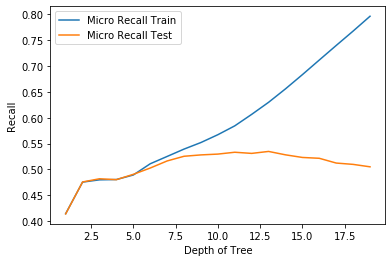

Micro Recall:
[0.41447164917790946, 0.47555143122278537, 0.47995336331406, 0.4805244247745497, 0.4893044947295786, 0.5110286244557071, 0.5252099840578676, 0.5394389321150689, 0.5521688438384847, 0.567278178313941, 0.5844100221286316, 0.6066338306326885, 0.6299759678302044, 0.6560068527375259, 0.6835129797511124, 0.7118281105003926, 0.7400004758845504, 0.7678397220834225, 0.7965355604730292]
[0.41399000713775874, 0.47580299785867236, 0.48201284796573873, 0.4802997858672377, 0.4905781584582441, 0.5027837259100643, 0.5164882226980728, 0.525553176302641, 0.5281941470378301, 0.5297644539614561, 0.5333333333333333, 0.5311206281227695, 0.5349036402569594, 0.5283369022127052, 0.5232690935046396, 0.5216274089935761, 0.5124197002141327, 0.5098501070663811, 0.5051391862955033]
The best result of the training recall measurement is:  0.7965355604730292  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.5349036402569594  with the value of n_neighbors =  12


In [147]:
#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))

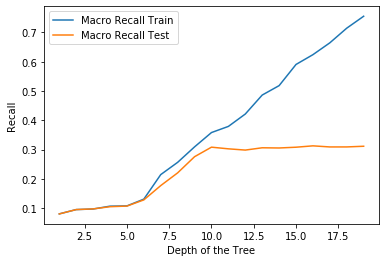

Macro Recall
[0.08061596788029884, 0.09529383700685151, 0.09719765258577182, 0.10695069419808606, 0.10781516915220396, 0.13094238538116082, 0.2147386416798138, 0.25660606803870223, 0.3094048562423665, 0.3582866985384554, 0.3792615975847047, 0.42152084304684323, 0.4863098157675563, 0.518490656143681, 0.5907773221431447, 0.6242328711272802, 0.6646491375870069, 0.7147029128590305, 0.7553949562873219]
[0.08046777207266251, 0.09529006116150833, 0.09756391672500887, 0.10509982466173422, 0.10723875322889453, 0.1283260770358983, 0.17722019238379685, 0.220687523166395, 0.2758252452603899, 0.3083666091751436, 0.3027020423203295, 0.29843491705725333, 0.306272724477665, 0.3055998607114592, 0.3082180819055935, 0.3128798902238864, 0.30915037916816535, 0.30919157554763077, 0.3114953190399801]
The best result of the training recall measurement is:  0.7553949562873219  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.3128798902238864  with the value of n_nei

In [148]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

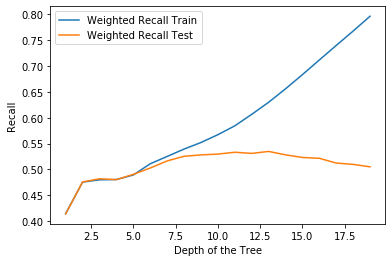

Weighted Recall:
[0.41447164917790946, 0.47555143122278537, 0.47995336331406, 0.4805244247745497, 0.4893044947295786, 0.5110286244557071, 0.5252099840578676, 0.5394389321150689, 0.5521688438384847, 0.567278178313941, 0.5844100221286316, 0.6066338306326885, 0.6299759678302044, 0.6560068527375259, 0.6835129797511124, 0.7118281105003926, 0.7400004758845504, 0.7678397220834225, 0.7965355604730292]
[0.41399000713775874, 0.47580299785867236, 0.48201284796573873, 0.4802997858672377, 0.4905781584582441, 0.5027837259100643, 0.5164882226980728, 0.525553176302641, 0.5281941470378301, 0.5297644539614561, 0.5333333333333333, 0.5311206281227695, 0.5349036402569594, 0.5283369022127052, 0.5232690935046396, 0.5216274089935761, 0.5124197002141327, 0.5098501070663811, 0.5051391862955033]
The best result of the training recall measurement is:  0.7965355604730292  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.5349036402569594  with the value of n_neighbors = 

In [149]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 6.3.1. Type of Contracts with all the Data:

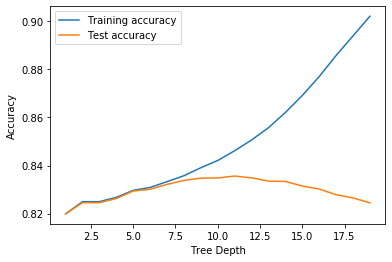

Training Accuracy:
[0.819882830412665, 0.8249741789771875, 0.8249741789771875, 0.8267612937510982, 0.829679819317125, 0.8308798004602784, 0.8332926196874049, 0.8357440097369898, 0.8390739574092407, 0.8420867672079438, 0.8461367035660868, 0.8506109189712733, 0.8557108388296756, 0.8620278824189905, 0.8690949142227765, 0.8769505050634918, 0.8857360812901511, 0.8938616678880761, 0.9020429678962187]
The best result of the measurement is:  0.9020429678962187  with the value of tree depth =  18  and the test accuracy is:  0.8244921573669324

Test Accuracy:
[0.819889431730522, 0.8245435844690152, 0.8245435844690152, 0.8262792491643096, 0.8293905888403188, 0.8301362818205195, 0.8321676523527899, 0.8338133196194395, 0.8347518642324505, 0.8348418616610954, 0.835626124967858, 0.8348675752121368, 0.8335176137824634, 0.8333761892517356, 0.8314733864746722, 0.8302262792491643, 0.827847775777835, 0.8265235278992029, 0.8244921573669324]
The best result of the measurement is:  0.835626124967858  with th

In [150]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)


#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XNormal_train, y3_train)
    y3_pred_test = tree.predict(XNormal_test)
    y3_pred_train=tree.predict(XNormal_train)
    macro_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y3_test,y3_pred_test,average='weighted'))
    listDepthsTrain.append(tree.score(XNormal_train,y3_train))
    listDepthsTest.append(tree.score(XNormal_test,y3_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

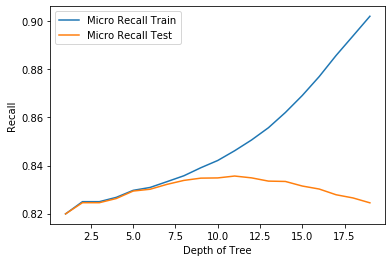

Micro Recall:
[0.819882830412665, 0.8249741789771875, 0.8249741789771875, 0.8267612937510982, 0.829679819317125, 0.8308798004602784, 0.8332926196874049, 0.8357440097369898, 0.8390739574092407, 0.8420867672079438, 0.8461367035660868, 0.8506109189712733, 0.8557108388296756, 0.8620278824189905, 0.8690949142227765, 0.8769505050634918, 0.8857360812901511, 0.8938616678880761, 0.9020429678962187]
[0.819889431730522, 0.8245435844690152, 0.8245435844690152, 0.8262792491643096, 0.8293905888403188, 0.8301362818205195, 0.8321676523527899, 0.8338133196194395, 0.8347518642324505, 0.8348418616610954, 0.835626124967858, 0.8348675752121368, 0.8335176137824634, 0.8333761892517356, 0.8314733864746722, 0.8302262792491643, 0.827847775777835, 0.8265235278992029, 0.8244921573669324]
The best result of the training recall measurement is:  0.9020429678962187  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.835626124967858  with the value of n_neighbors =  10


In [151]:
#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))

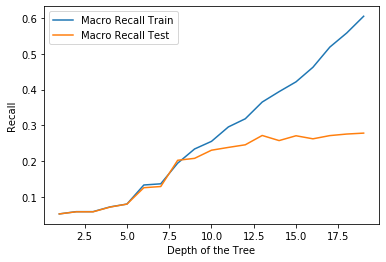

Macro Recall
[0.05263157894736842, 0.05898268317754907, 0.05898268317754907, 0.07221905837940716, 0.08013249076412605, 0.1334229508319534, 0.13673302450538444, 0.1943919789033293, 0.23401044374007848, 0.2553116803915814, 0.29564646668964195, 0.3184480649452292, 0.3651228186578591, 0.3942138085766457, 0.42162759183299664, 0.462290721408854, 0.5186791540372618, 0.5581294580161916, 0.6048492882588841]
[0.05263157894736842, 0.05856849195091379, 0.05856849195091379, 0.07169795317534006, 0.0800467747431122, 0.1258340418917403, 0.1291570301967156, 0.2024473350170438, 0.20787236575157894, 0.2306109807915079, 0.23843403389585188, 0.2457289599621696, 0.2717550868559485, 0.25749755139277786, 0.27097026039734934, 0.262427999619378, 0.2714233783854812, 0.2757690539131931, 0.27835141637084376]
The best result of the training recall measurement is:  0.6048492882588841  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.27835141637084376  with the value of n_

In [152]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

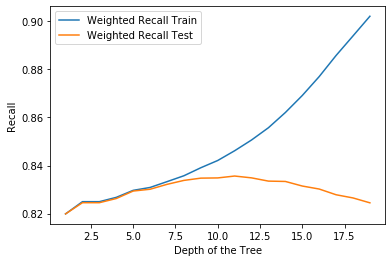

Weighted Recall:
[0.819882830412665, 0.8249741789771875, 0.8249741789771875, 0.8267612937510982, 0.829679819317125, 0.8308798004602784, 0.8332926196874049, 0.8357440097369898, 0.8390739574092407, 0.8420867672079438, 0.8461367035660868, 0.8506109189712733, 0.8557108388296756, 0.8620278824189905, 0.8690949142227765, 0.8769505050634918, 0.8857360812901511, 0.8938616678880761, 0.9020429678962187]
[0.819889431730522, 0.8245435844690152, 0.8245435844690152, 0.8262792491643096, 0.8293905888403188, 0.8301362818205195, 0.8321676523527899, 0.8338133196194395, 0.8347518642324505, 0.8348418616610954, 0.835626124967858, 0.8348675752121368, 0.8335176137824634, 0.8333761892517356, 0.8314733864746722, 0.8302262792491643, 0.827847775777835, 0.8265235278992029, 0.8244921573669324]
The best result of the training recall measurement is:  0.9020429678962187  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.835626124967858  with the value of n_neighbors =  10


In [153]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

### 6.3.2. Type of Contract without 'Prestación de servicios':

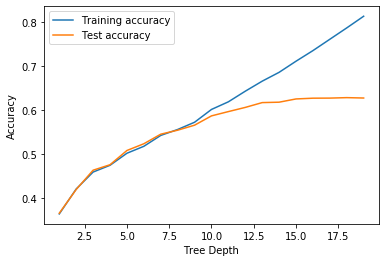

Training Accuracy:
[0.36404957785407355, 0.42085033793267257, 0.4593832998639632, 0.47480080326488305, 0.5022348901988728, 0.5180086804430912, 0.5428084040508735, 0.5563149143831919, 0.5728012783140075, 0.6019628166094448, 0.6193560925050204, 0.6435404115652869, 0.6663643626784134, 0.686510764181296, 0.7118179266265034, 0.7359374662607155, 0.7618168469694026, 0.7876530413940532, 0.8142126060763102]
The best result of the measurement is:  0.8142126060763102  with the value of tree depth =  18  and the test accuracy is:  0.6279838056680161

Test Accuracy:
[0.3657004048582996, 0.4197246963562753, 0.4636113360323887, 0.47604858299595143, 0.5085020242914979, 0.5238542510121458, 0.5456194331983806, 0.5547206477732793, 0.5661214574898785, 0.5873036437246963, 0.597085020242915, 0.6066072874493927, 0.6175546558704453, 0.6184939271255061, 0.6258785425101214, 0.6275951417004049, 0.6277894736842106, 0.6288582995951417, 0.6279838056680161]
The best result of the measurement is:  0.6288582995951417 

In [154]:
#Import the necessary libraries to create the decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Definition of the training and test sets.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
depth_tree = range(1,20)

#Definition of the lists for the depth of the trees and the measurements.
listDepthsTrain=list()
listDepthsTest=list()
#Define the lists for the recall measurements.
micro_recall_train = []
macro_recall_train = []
weighted_recall_train = []

micro_recall_test = []
macro_recall_test = []
weighted_recall_test = []
#Method for the definition of the Decision Trees in relation to the depth of the tree.
for depth in depth_tree:
    tree= DecisionTreeClassifier(max_depth=depth,random_state=0)
    tree.fit(XPrunCon_train, y6_train)
    y6_pred_test = tree.predict(XPrunCon_test)
    y6_pred_train=tree.predict(XPrunCon_train)
    macro_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='macro'))
    macro_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='macro'))
    micro_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='micro'))
    micro_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='micro'))
    weighted_recall_train.append(metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
    weighted_recall_test.append(metrics.recall_score(y6_test,y6_pred_test,average='weighted'))
    listDepthsTrain.append(tree.score(XPrunCon_train,y6_train))
    listDepthsTest.append(tree.score(XPrunCon_test,y6_test))
    
#Method for the creation of the plot for the accuracy.
plt.plot(depth_tree, listDepthsTrain, label='Training accuracy')
plt.plot(depth_tree, listDepthsTest, label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

#Print the results of the accuracy.
print("Training Accuracy:")
print(listDepthsTrain)
print("The best result of the measurement is: ",max(listDepthsTrain)," with the value of tree depth = ",listDepthsTrain.index(max(listDepthsTrain))," and the test accuracy is: ",listDepthsTest[listDepthsTrain.index(max(listDepthsTrain))])
print("")
print("Test Accuracy:")
print(listDepthsTest)
print("The best result of the measurement is: ",max(listDepthsTest)," with the value of tree depth = ",listDepthsTest.index(max(listDepthsTest)), "and the training accuracy is: ",listDepthsTrain[listDepthsTest.index(max(listDepthsTest))])

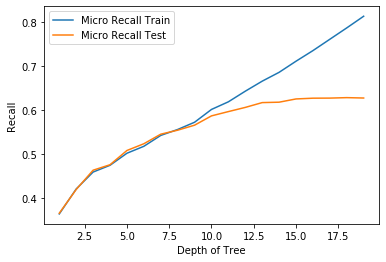

Micro Recall:
[0.36404957785407355, 0.42085033793267257, 0.4593832998639632, 0.47480080326488305, 0.5022348901988728, 0.5180086804430912, 0.5428084040508735, 0.5563149143831919, 0.5728012783140075, 0.6019628166094448, 0.6193560925050204, 0.6435404115652869, 0.6663643626784134, 0.686510764181296, 0.7118179266265034, 0.7359374662607155, 0.7618168469694026, 0.7876530413940532, 0.8142126060763102]
[0.3657004048582996, 0.4197246963562753, 0.4636113360323887, 0.47604858299595143, 0.5085020242914979, 0.5238542510121458, 0.5456194331983806, 0.5547206477732793, 0.5661214574898785, 0.5873036437246963, 0.597085020242915, 0.6066072874493927, 0.6175546558704453, 0.6184939271255061, 0.6258785425101214, 0.6275951417004049, 0.6277894736842106, 0.6288582995951417, 0.6279838056680161]
The best result of the training recall measurement is:  0.8142126060763102  with the value of n_neighbors =  18
The best result of the test recall measurement is:  0.6288582995951417  with the value of n_neighbors =  17


In [155]:
#Method for the creation of the plot for the recall.
plt.plot(depth_tree, micro_recall_train, label='Micro Recall Train')
plt.plot(depth_tree, micro_recall_test, label='Micro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of Tree')
plt.legend()
plt.show()

#Print the results of the recall measurements.
print("Micro Recall:")
print(micro_recall_train)
print(micro_recall_test)
print("The best result of the training recall measurement is: ",max(micro_recall_train)," with the value of n_neighbors = ",micro_recall_train.index(max(micro_recall_train)))
print("The best result of the test recall measurement is: ",max(micro_recall_test)," with the value of n_neighbors = ",micro_recall_test.index(max(micro_recall_test)))

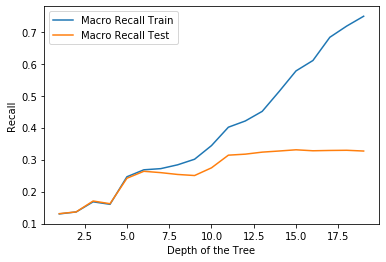

Macro Recall
[0.1299948512177548, 0.13614341054489001, 0.16780570565904002, 0.16005334988806405, 0.2462494270902315, 0.26802363688476244, 0.27167332169590064, 0.28366314714616797, 0.30109458334524036, 0.34370326654592387, 0.4013235665831948, 0.4207835692643017, 0.45089304780365275, 0.5129903797845898, 0.5775142764233048, 0.6100645734740962, 0.6827239813953069, 0.7178570955559611, 0.7485234011536916]
[0.13078624062406882, 0.13631560726054642, 0.17039534842524764, 0.16195144507837672, 0.24161134125443773, 0.2633522262811575, 0.25916307799944405, 0.25345479402876575, 0.25012501846757357, 0.2741633859487719, 0.3138406742697487, 0.3169835685874998, 0.32332198763548736, 0.32683230329320967, 0.3306279108482453, 0.3275830284587548, 0.32857953421884384, 0.3291088703314505, 0.32674845016855625]
The best result of the training recall measurement is:  0.7485234011536916  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.3306279108482453  with the value o

In [156]:
#Plot for the recall scores.
plt.plot(depth_tree, macro_recall_train, label='Macro Recall Train')
plt.plot(depth_tree, macro_recall_test, label='Macro Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Macro Recall")
print(macro_recall_train)
print(macro_recall_test)
print("The best result of the training recall measurement is: ",max(macro_recall_train)," with the value of n_neighbors = ",macro_recall_train.index(max(macro_recall_train)))
print("The best result of the training recall measurement is: ",max(macro_recall_test)," with the value of n_neighbors = ",macro_recall_test.index(max(macro_recall_test)))

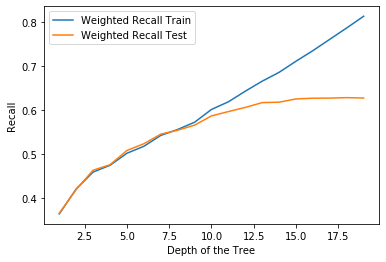

Weighted Recall:
[0.36404957785407355, 0.42085033793267257, 0.4593832998639632, 0.47480080326488305, 0.5022348901988728, 0.5180086804430912, 0.5428084040508735, 0.5563149143831919, 0.5728012783140075, 0.6019628166094448, 0.6193560925050204, 0.6435404115652869, 0.6663643626784134, 0.686510764181296, 0.7118179266265034, 0.7359374662607155, 0.7618168469694026, 0.7876530413940532, 0.8142126060763102]
[0.3657004048582996, 0.4197246963562753, 0.4636113360323887, 0.47604858299595143, 0.5085020242914979, 0.5238542510121458, 0.5456194331983806, 0.5547206477732793, 0.5661214574898785, 0.5873036437246963, 0.597085020242915, 0.6066072874493927, 0.6175546558704453, 0.6184939271255061, 0.6258785425101214, 0.6275951417004049, 0.6277894736842106, 0.6288582995951417, 0.6279838056680161]
The best result of the training recall measurement is:  0.8142126060763102  with the value of n_neighbors =  18
The best result of the training recall measurement is:  0.6288582995951417  with the value of n_neighbors =

In [157]:
#Plot for the recall scores.
plt.plot(depth_tree, weighted_recall_train, label='Weighted Recall Train')
plt.plot(depth_tree, weighted_recall_test, label='Weighted Recall Test')
plt.ylabel('Recall')
plt.xlabel('Depth of the Tree')
plt.legend()
plt.show()
print("Weighted Recall:")
print(weighted_recall_train)
print(weighted_recall_test)
print("The best result of the training recall measurement is: ",max(weighted_recall_train)," with the value of n_neighbors = ",weighted_recall_train.index(max(weighted_recall_train)))
print("The best result of the training recall measurement is: ",max(weighted_recall_test)," with the value of n_neighbors = ",weighted_recall_test.index(max(weighted_recall_test)))

## 7. Neural Networks:

### 7.1.1. Departments with all the Data:

In [158]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200,300],
             'mlpClassifier__activation':['tanh','logistic','relu'],
             'mlpClassifier__learning_rate_init':[0.0001,0.001,0.1,1,10]}


# Create train and test sets
XNormal_train, XNormal_test, y1_train, y1_test = train_test_split(XNormal,y1, stratify=y1,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y1_train)

# Predict the labels of the test set: y_pred
y1_pred_train = cv.predict(XNormal_train)
y1_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y1_train,y1_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y1_test,y1_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y1_train,y1_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y1_test,y1_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.6993747241114783
Test Accuracy:  0.6993314476729237

Macro Scores:
Train Recall:  0.03840739179292088
Test Recall:  0.037234480084160936

Micro Scores:
Train Recall:  0.6993747241114783
Test Recall:  0.6993314476729237

Weighted Scores:
Train Recall:  0.6993747241114783
Test Recall:  0.6993314476729237
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 200, 'mlpClassifier__learning_rate_init': 0.001}


### 7.1.2. Department without 'Bogotá DC':

In [159]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200],
             'mlpClassifier__activation':['relu'],
             'mlpClassifier__learning_rate_init':[0.001,0.1,1]}


#Definition of the training and test sets.
XPrunDep_train, XPrunDep_test, y4_train, y4_test = train_test_split(XPrunDep,y4, stratify=y4,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunDep_train,y4_train)

# Predict the labels of the test set: y_pred
y4_pred_train = cv.predict(XPrunDep_train)
y4_pred_test = cv.predict(XPrunDep_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y4_train,y4_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y4_test,y4_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y4_train,y4_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y4_test,y4_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.29925187032418954
Test Accuracy:  0.29969660446365487

Macro Scores:
Train Recall:  0.07449397400368014
Test Recall:  0.0735449165415339

Micro Scores:
Train Recall:  0.29925187032418954
Test Recall:  0.29969660446365487

Weighted Scores:
Train Recall:  0.29925187032418954
Test Recall:  0.29969660446365487
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 200, 'mlpClassifier__learning_rate_init': 0.001}


### 7.2.1. Type of Process with all the Data:

In [160]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200],
             'mlpClassifier__activation':['relu'],
             'mlpClassifier__learning_rate_init':[0.001,0.1,1]}


#Definition of the training and test sets.
XNormal_train, XNormal_test, y2_train, y2_test = train_test_split(XNormal,y2, stratify=y2,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y2_train)

# Predict the labels of the test set: y_pred
y2_pred_train = cv.predict(XNormal_train)
y2_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y2_train,y2_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y2_test,y2_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y2_train,y2_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y2_test,y2_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.6465584112249665
Test Accuracy:  0.6449730007714065

Macro Scores:
Train Recall:  0.23004450391074996
Test Recall:  0.24093253123954278

Micro Scores:
Train Recall:  0.6465584112249665
Test Recall:  0.6449730007714065

Weighted Scores:
Train Recall:  0.6465584112249665
Test Recall:  0.6449730007714065
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 200, 'mlpClassifier__learning_rate_init': 0.001}


### 7.2.2. Type of Process without 'Contratación directa':

In [161]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200],
             'mlpClassifier__activation':['relu'],
             'mlpClassifier__learning_rate_init':[0.001,0.1,1]}


#Definition of the training and test sets.
XPrunProc_train, XPrunProc_test, y5_train, y5_test = train_test_split(XPrunProc,y5, stratify=y5,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunProc_train,y5_train)

# Predict the labels of the test set: y_pred
y5_pred_train = cv.predict(XPrunProc_train)
y5_pred_test = cv.predict(XPrunProc_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y5_train,y5_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y5_test,y5_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y5_train,y5_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y5_test,y5_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.49099388488352724
Test Accuracy:  0.4917201998572448

Macro Scores:
Train Recall:  0.2014211575547939
Test Recall:  0.16078378476404248

Micro Scores:
Train Recall:  0.49099388488352724
Test Recall:  0.4917201998572448

Weighted Scores:
Train Recall:  0.49099388488352724
Test Recall:  0.4917201998572448
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 100, 'mlpClassifier__learning_rate_init': 0.001}


### 7.3.1. Type of Contracts with all the Data:

In [162]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200],
             'mlpClassifier__activation':['relu'],
             'mlpClassifier__learning_rate_init':[0.001,0.1,1]}


#Definition of the training and test sets.
XNormal_train, XNormal_test, y3_train, y3_test = train_test_split(XNormal,y3, stratify=y3,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XNormal_train,y3_train)

# Predict the labels of the test set: y_pred
y3_pred_train = cv.predict(XNormal_train)
y3_pred_test = cv.predict(XNormal_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y3_train,y3_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y3_test,y3_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y3_train,y3_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y3_test,y3_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.8274598542022911
Test Accuracy:  0.8274492157366933

Macro Scores:
Train Recall:  0.16048987427943576
Test Recall:  0.14995306307057527

Micro Scores:
Train Recall:  0.8274598542022911
Test Recall:  0.8274492157366933

Weighted Scores:
Train Recall:  0.8274598542022911
Test Recall:  0.8274492157366933
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 100, 'mlpClassifier__learning_rate_init': 0.001}


### 7.3.2. Type of Contract without 'Prestación de servicios':

In [163]:
#Import the necessary libraries for the Naive Bayes Method and the required metrics.
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Method of the Naive Bayes algorithm using a Gaussian distribution.
steps = [('scaler', StandardScaler()),
         ('mlpClassifier', MLPClassifier())]


pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'mlpClassifier__hidden_layer_sizes':[1,100,200],
             'mlpClassifier__activation':['relu'],
             'mlpClassifier__learning_rate_init':[0.001,0.1,1]}


#Definition of the training and test sets.
XPrunCon_train, XPrunCon_test, y6_train, y6_test = train_test_split(XPrunCon,y6, stratify=y6,random_state=66)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(XPrunCon_train,y6_train)

# Predict the labels of the test set: y_pred
y6_pred_train = cv.predict(XPrunCon_train)
y6_pred_test = cv.predict(XPrunCon_test)

#Presentation of the results of the Gaussian NB method.
print("Training Accuracy: ", metrics.accuracy_score(y6_train,y6_pred_train))
print("Test Accuracy: ", metrics.accuracy_score(y6_test,y6_pred_test))
print("")
print("Macro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='macro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='macro'))
print("")
print("Micro Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='micro'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='micro'))
print("")
print("Weighted Scores:")
print("Train Recall: ", metrics.recall_score(y6_train,y6_pred_train,average='weighted'))
print("Test Recall: ", metrics.recall_score(y6_test,y6_pred_test,average='weighted'))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum

Training Accuracy:  0.5186564747036341
Test Accuracy:  0.5226234817813765

Macro Scores:
Train Recall:  0.2655141670768328
Test Recall:  0.24784683431657342

Micro Scores:
Train Recall:  0.5186564747036341
Test Recall:  0.5226234817813765

Weighted Scores:
Train Recall:  0.5186564747036341
Test Recall:  0.5226234817813765
Tuned Model Parameters: {'mlpClassifier__activation': 'relu', 'mlpClassifier__hidden_layer_sizes': 200, 'mlpClassifier__learning_rate_init': 0.001}
